In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import tensorflow as tf

# DataSets

In [3]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[x_grid.reshape(-1), y_grid.reshape(-1)])
    Z = Z.reshape(x_grid.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(12,6))
    plt.contourf(x_grid, y_grid, Z, cmap=plt.cm.Spectral)
    plt.ylabel('y')
    plt.xlabel('x')
#     plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)    
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)
    plt.colorbar();

## Datasets para Clasificación Binaria 

### Dataset 1

In [4]:
def load_dataset_2():
    np.random.seed(1)
    m = 300
    N = int(m/2)
    D = 2
    X = np.zeros((m,D))
    Y = np.zeros((m,1))
    a = 8
    
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    
    return (X, Y)

### Dataset 2

In [5]:
def load_dataset_3():
    np.random.seed(3)
    train_X, train_Y = sklearn.datasets.make_moons(n_samples=300, noise=.2) #300 #0.2 +
    train_Y = np.c_[train_Y]
    return (train_X, train_Y)

### Dataset 3

In [6]:
def load_dataset_4():
    np.random.seed(3)
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, # número de datos entrenamiento
                                                     noise=.2, # porcentaje de ruio
                                                     factor=0.5, 
                                                     random_state=1) #300 #0.2 +
    train_Y = np.c_[train_Y]
    return (train_X, train_Y)

### Dataset 4

In [7]:
def load_dataset_5():
    np.random.seed(2)
    train_X, train_Y = sklearn.datasets.make_classification(n_samples = 300, # número de datos de entrenamiento
                                                            n_features=2, # dimensión de cada dato entrenamiento
                                                            n_redundant=0, 
                                                            n_informative=2,
                                                            random_state=1, 
                                                            n_clusters_per_class=1)
    
    rng = np.random.RandomState(2)
    train_X += 2 * rng.uniform(size=train_X.shape)

    train_Y = np.c_[train_Y]

    return (train_X, train_Y)

## Dataset para Multiclass Classification

### Dataset 1

In [8]:
def load_dataset_1():
    np.random.seed(1)    
    N = 100 # number of points per class
    D = 2 # dimensionality
    K = 3 # number of classes
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    Y = np.zeros((N*K,1), dtype='uint8') # class labels
    for j in range(K):
        ix = range(N*j,N*(j+1))
        r = np.linspace(0.0,1,N) # radius
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    
    return (X, Y)

dataset = load_dataset_1()

### Dataset 2

In [9]:
def load_dataset_6():
    np.random.seed(2)
    train_X, train_Y = sklearn.datasets.make_blobs(n_samples=300, # número de datos de entrenamiento
                                                   centers=4, # número de clases
                                                   n_features=2, # dimensión de cada dato de entrenamiento
                                                   random_state=0)

    train_Y = np.c_[train_Y]
    return (train_X, train_Y)

### Dataset 3

In [10]:
def load_dataset_7():
    np.random.seed(2)
    train_X, train_Y = sklearn.datasets.make_blobs(n_samples=300, # número de datos de entrenamiento
                                                   centers=6, # número de clases
                                                   n_features=2, # dimensión de cada dato de entrenamiento
                                                   random_state=0)

    train_Y = np.c_[train_Y]
    return (train_X, train_Y)

In [11]:
ds_binary_1 = load_dataset_2()
ds_binary_2 = load_dataset_3()
ds_binary_3 = load_dataset_4()
ds_binary_4 = load_dataset_5()
ds_multi_1 = load_dataset_1()
ds_multi_2 = load_dataset_6()
ds_multi_3 = load_dataset_7()

## Ploteando Datasets

In [12]:
def plot_n_m_images(datasets, names, figx, figy, n, m):
    fig = plt.figure(figsize=(figx,figy))
#     fig = plt.figure()
    for i in range(1, n*m+1):
        fig.add_subplot(n,m,i)
        if i <= len(datasets):
            plt.scatter(datasets[i-1][0][:, 0],
                        datasets[i-1][0][:, 1],
                        c=np.squeeze(np.asarray(datasets[i-1][1])),
                        s=40,
                        cmap=plt.cm.Spectral)
            plt.title(names[i-1])
    plt.show()

### Ploteo Binary Datasets

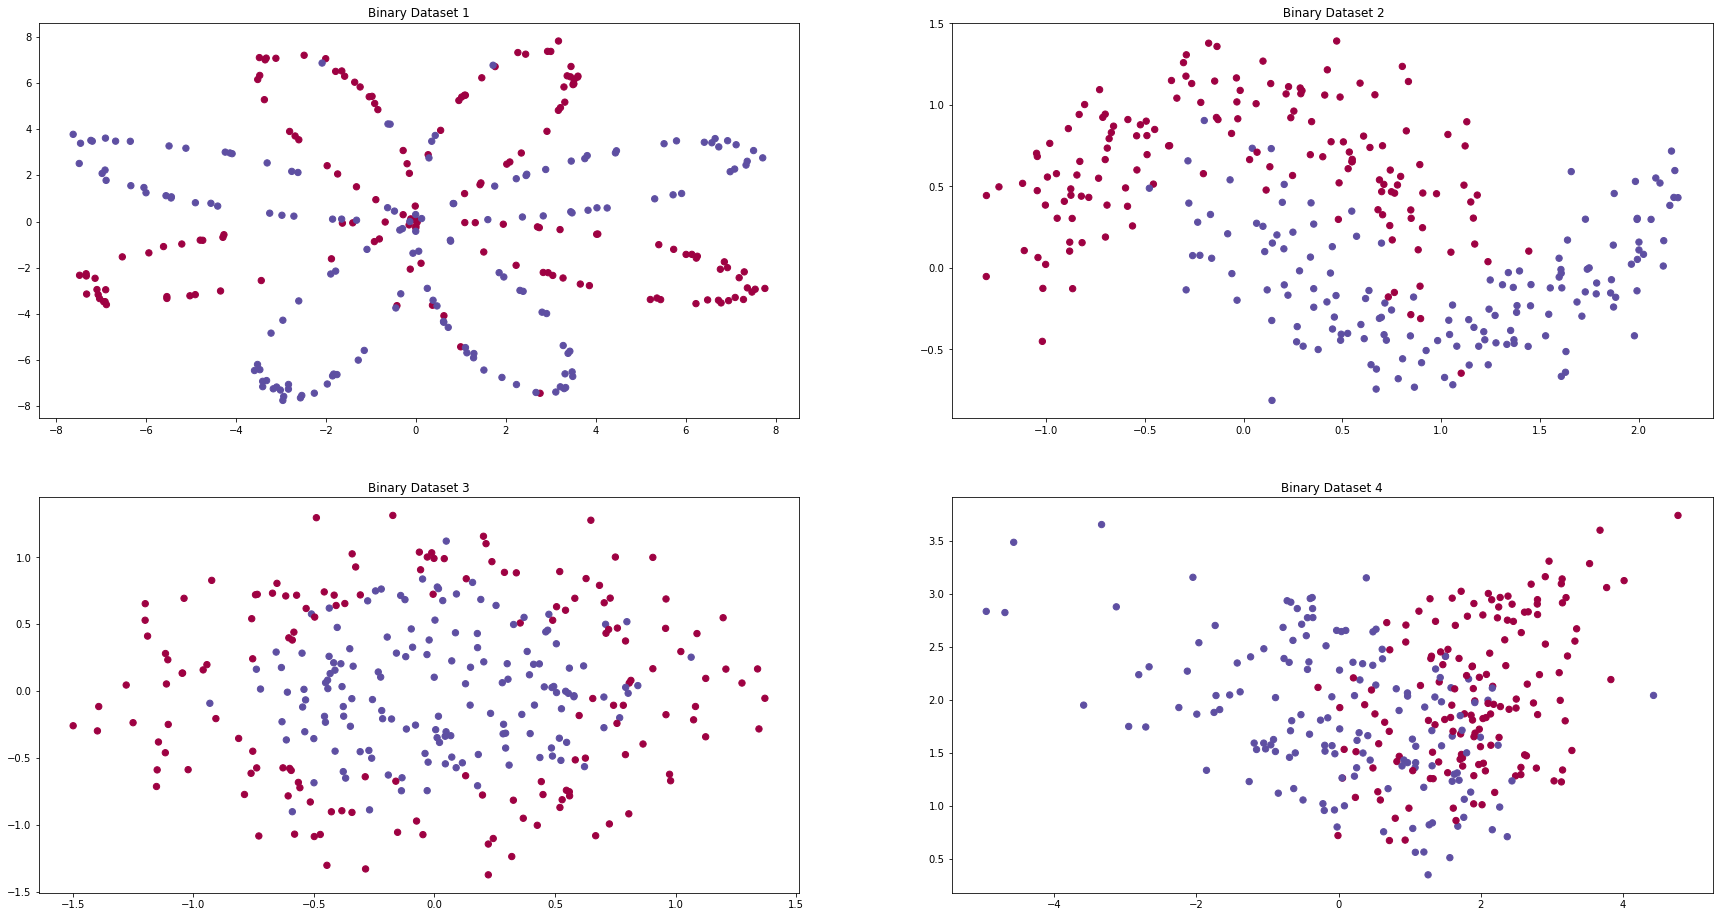

In [13]:
plot_n_m_images([ds_binary_1, ds_binary_2, ds_binary_3, ds_binary_4],
             ['Binary Dataset 1', ' Binary Dataset 2', 'Binary Dataset 3', 'Binary Dataset 4'],
             figx=30, figy=16,n=2,m=2)

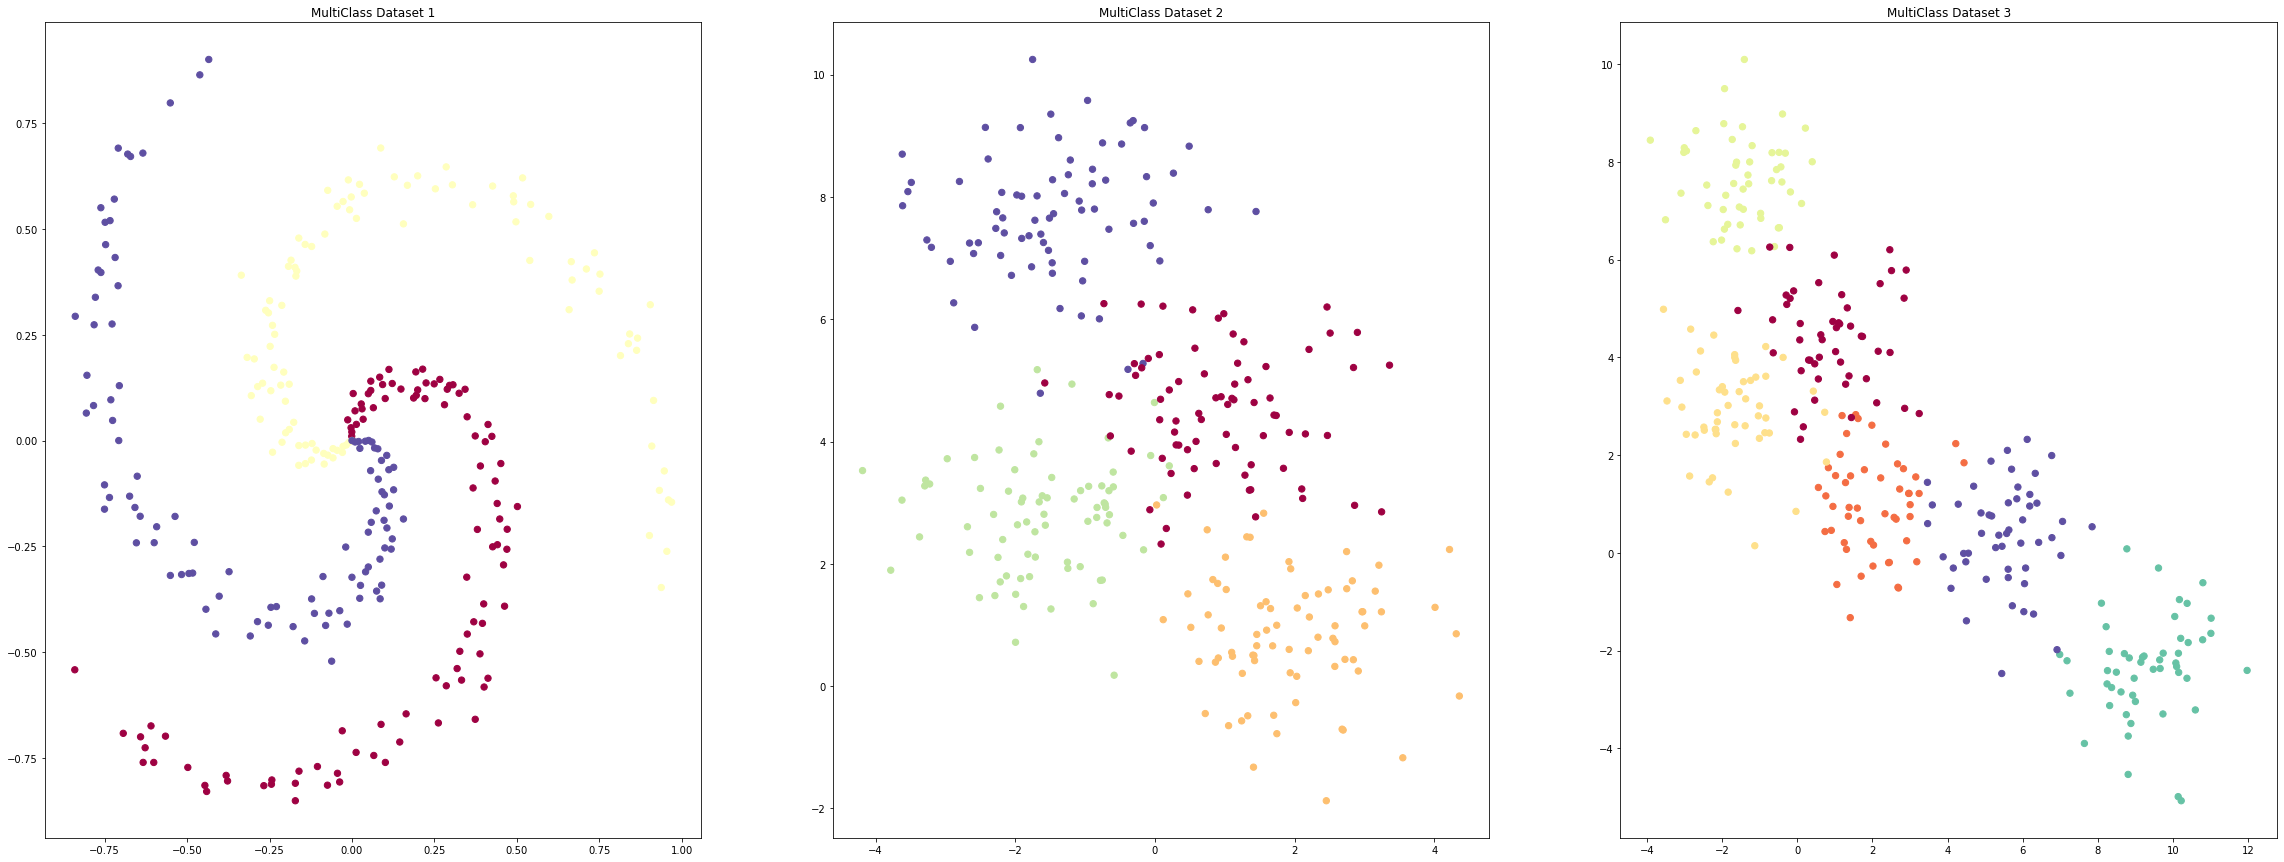

In [14]:
plot_n_m_images([ds_multi_1, ds_multi_2, ds_multi_3],
             ['MultiClass Dataset 1', 'MultiClass Dataset 2', 'MultiClass Dataset 3'],
             figx=40, figy=15, n=1, m=3)

### Ploteo Multiclass Datasets

# Construcción del Modelo Tensorflow
Cada modelo que se construye debe tener la siguiente estructura:


1.   Inicialización del modelo.
2.   Construcción de la arquitectura del modelo: Agregar capas de redes feed forward,  redes convolucionales, redes recurrentes, etc. En cada capa, se puede definir el número de neuronas de entrada (solo la primera capa), el número de neuronas de salida, función de activación, inicialización de los parametros, presencia de bias, etc.
3.   Definición de la función de perdida (binary cross entropy, softmax cross entropy, root mean square error,etc), optimizador (stochastic gradient descent, momentum, adam, etc).
4.   Entrenar el modelo, se setea datos X y Y. También se define la métricas de entrenamiento.
5. Predicción del modelo. Se usa el modelo entrenado.


## Inicialización del Modelo
Para construir un modelo de clasificación o regresión que no use redes recurrentes se usa [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential://)

In [15]:
model = tf.keras.Sequential()

## Definición de la Arquitectura del Modelo

Se define una arquitectura para "logistic regression". El logistic regression puede ser considerado como una red neuronal de una sola capa, con una función de activación en este caso usaremos una función sigmoide, por tanto la arquitectura cumple la siguiente formulación
$${z}^{(i)} = w^{T}x^{(i)}+b$$
$$\hat{y}^{(i)} = sigmoid(z^{(i)})\tag{2}$$

donde la función de perdida es :
$$ \mathcal{L}(\hat{y}^{(i)}, y^{(i)}) =  - y^{(i)}  \log(\hat{y}^{(i)}) - (1-y^{(i)} )  \log(1-\hat{y}^{(i)})\tag{3}$$

Resultando en la función de costo:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(\hat{y}^{(i)}, y^{(i)})\tag{6}$$

Por tanto esta red cuenta con una única capa. Para definer una capa estilo $funActi(w^{T}x^{(i)}+b)$ se usa: [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense). Esta función recibe como parametros:


* **units**: (integer), número de neuronas de salida.
* **input_dim**: (integer), número de neuronas de entrada. Solo se define en la primera capa, en la siguientes TensorFlow define este valor, usando las **units** de la capa anterior.
* **activation**: (string o función), define función de activación, entre ellas: [elu](https://www.tensorflow.org/api_docs/python/tf/keras/activations/elu), [linear](https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear) (es no aplicar una función activación no lineal), [relu](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu), [sigmoid](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid), [softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax), [tanh](https://www.tensorflow.org/api_docs/python/tf/keras/activations/tanh). Para mayor detalle revisar: https://www.tensorflow.org/api_docs/python/tf/keras/activations 
* **use_bias**: (boolean), True para usar bias, False para no usar bias. En caso de False, se definiría la capa como: $funActi(w^{T}x^{(i)})$.
* **kernel_initializer** (string o función), manera de inicializar los valores de la matriz de pesos. Esta matriz presenta la dimension: (**input_dim**, **units**) Para mayor detalle revisar: https://www.tensorflow.org/api_docs/python/tf/keras/initializers 
* **bias_initializer** (string o función), manera de inicialiar los valores del bias. Este vector presenta la dimensión: (**units**). Para mayor detalle revisar: https://www.tensorflow.org/api_docs/python/tf/keras/initializers

En general los parametros son los más usados. Pero también presenta otros como: **bias_regularizer**, **activity_regularizer**, **kernel_constraint**, **bias_constraint**. Para mayor detalle revisar: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense 



In [16]:
model.add(tf.keras.layers.Dense(units=1,                      # numero de neuronas de salida
                                activation='sigmoid',         # función de activación
                                use_bias=True,                # True: se usa bias, false: no se usa bias
                                kernel_initializer='uniform', # como se inicializa la matriz de pesos
                                bias_initializer='zeros',     # como se inicializa el bias
                                input_dim=2))                 # input_dim: número de neuronas entrada

## Función de Perdida & Optimizador

Para definir la función a optimizar (función de perdida), y el optimizador se usa: [model.compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile). Esta función presenta como parametros:
* **loss** (string o función), define la función de perdida entre ellas: [binary cross entropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy), [multi class classification](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy), [Mean Absolute Error](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanAbsoluteError) usada para regresión. Para mayor detalle revisar: https://www.tensorflow.org/api_docs/python/tf/keras/losses
* **optimizer** (string o función), define el optimizar, entre ellos: 
  * Basados en cambio dinámico de gradiente: [Stochastic Gradient Descent](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD), [Momentun](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD). Nota: para usar momentum se usa: **tf.keras.optimizers.SGD(..., name='momentum')**
  * Basados en cambio dinámico de parametro de aprendizaje: [Adadelta](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adadelta), [Adagrad](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adagrad), [RMS Prop](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop), [ADAM](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)
* **metrics** (array de string o función), se define las metricas de evaluacióna, entre ellas [accuracy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy), [area under curve](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/AUC), [mean absolute error](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanAbsoluteError), etc. Para mayor detalle revisar: https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy

Para mayor detalle revisar: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers


In [17]:
model.compile(loss=tf.keras.losses.binary_crossentropy,               # función de perdida binary cross entropy
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  # metodo de optimización: Gradiente Descendiente
              metrics=['accuracy'])                                   # metrica: accuracy

## Entrenamiento
Al igual que se hace en [scikit-learn](https://scikit-learn.org/stable/) se usa la función [model.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit), donde model es el modelo previamente definido. Entre sus parametros se tiene: 
* **x** (array, list, tensor) que representa los datos entrada. Para el ejemplo en este iPython, se tiene la dimensión de (**m**, **n**). Donde **m** es la cantidad de datos entrenamiento, y **n** es el número de features de cada dato entrenamiento.
* **y** (array, list, tensor) representa el target. En caso de clasificación binaria se tiene la dimensión de (**m**, **1**). Donde **m** es la cantidad de datos de entrenamiento.
* **batch_size** (integer), tamaño del batch, por default es 32.
* **epochs** (integer), número de épocas de entrenamiento.
* **verbose** (boolean), en caso de **True** se imprime por cada época finalizada el valor de perdida y las métricas escogidas. Si es **False** no se imprime nada.

La función **model.fit** retorna un objeto **History**. Donde **History.history** es el registro de los valor de la función perdidas, y las distintas metricas elegidas en **model.compile(..., metrics=\[...\])**

In [18]:
print("X.shape: %s"%str(ds_binary_1[0].shape))
print("Y.shape: %s"%str(ds_binary_1[1].shape))

history = model.fit(x=ds_binary_1[0], # X
                    y=ds_binary_1[1], # y
                    epochs=500,       # numero de epocas 
                    batch_size=64,    # tamaño del batch size
                    verbose=False)    # si se imprime o no el resultado de la función de costo
print("Finished training the model, epoch:%d, loss:%f , accuracy:%f"%(4,
                                                                      history.history['loss'][-1],
                                                                      history.history['accuracy'][-1]))                    

X.shape: (300, 2)
Y.shape: (300, 1)
Finished training the model, epoch:4, loss:0.660555 , accuracy:0.550000


In [19]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


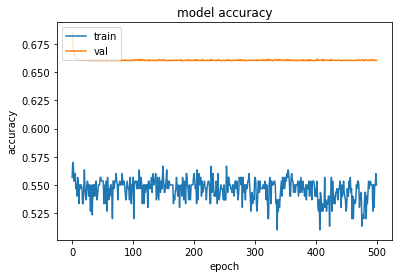

In [20]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Predicción
Para usar el modelo entrenado se usa la función: [model.predict](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict). Esta función tiene los parametros:
* **x** (array, list, tensor), datos de entrada. Se tiene la dimensión de (**\***, **input_dim**), donde **input_dim** son los datos de entrada definidos en la primera capa del modelo.

El valor de retorno de esta función, presenta las mismas características del **y**, con una dimensión de (**\***, **units**), donde **units** es definida en la última capa modelo. 

In [21]:
a_test = ds_binary_1[0][1]
# print(a_test)
print(ds_binary_1[0][2:5])
print(model.predict(ds_binary_1[0][2:3]))
print(model.predict([[0.11534148,-1.80667995]]))

[[ 0.11534148 -1.80667995]
 [ 0.62389854 -4.07906972]
 [ 1.76186086  6.70825639]]
[[0.5538798]]
[[0.5538798]]


## Visualización

### Visualización de la Función de Costo

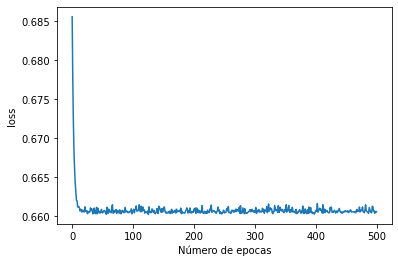

In [22]:
plt.xlabel('Número de epocas')
plt.ylabel('loss')
plt.plot(history.history['loss'])

### Visualización de la Accuracy

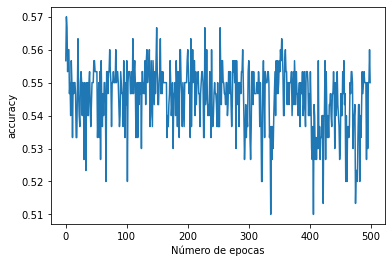

In [23]:
plt.xlabel('Número de epocas')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'])

# Clasificador multiclass
Para construir un clasificador multiclase se usara una función softmax, y como función de costo: softmax cross entropy. 
* Función softmax: [tf.keras.activations.softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax)
* Función softmax cross entropy: [tf.keras.losses.CategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy)

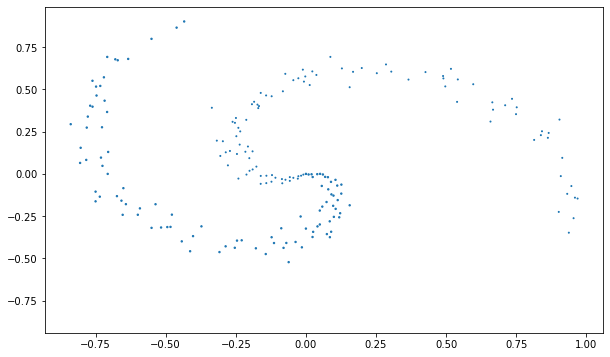

In [24]:
plt.figure(figsize=(10,6))
#np.squeeze(np.asarray(ds_multi_1[1]))
plt.scatter(ds_multi_1[0][:, 0], ds_multi_1[0][:, 1],np.squeeze(np.asarray(ds_multi_1[1])), cmap=plt.cm.Spectral);

In [25]:
type(ds_multi_1)

tuple

## Inicialización del Modelo

In [26]:
model_multiclass = tf.keras.Sequential()

## Definición de la Arquitectura del Modelo

In [27]:
model_multiclass.add(tf.keras.layers.Dense(units=4  ,
                                          input_dim=2,
                                          use_bias=True,
                                          kernel_initializer='uniform', 
                                          bias_initializer='zeros',
                                          activation='tanh'))           # activation=tf.nn.tanh
model_multiclass.add(tf.keras.layers.Dense(units=3,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='softmax'))       # activation=tf.nn.softmax                          

### One Hot Encoding
Considerar que  si hablamos de problemas de clasificación, sobre labels categoricos, estos valores deben ser convertidos a su representa one-hot encoding. Por ejemplo si se tiene 3 categorias. Entonces los datos:
* tipo 1, se convertirá en [1 0 0]
* tipo 2, se convertirá en [0 1 0]
* tipo 3, se convertirá en [0 0 1]

In [28]:
y_onehot_encoding = tf.keras.backend.one_hot(np.ravel(ds_multi_1[1]), 3).numpy() # conversión one hot encoding

## Función de Perdida & Opt

In [29]:
model_multiclass.compile(loss=tf.keras.losses.categorical_crossentropy,
                        optimizer=tf.keras.optimizers.SGD(learning_rate=0.02),
                        metrics=['accuracy'])

## Predic

In [30]:
history = model_multiclass.fit(x=ds_multi_1[0],
                     y=y_onehot_encoding,
                     batch_size=32,
                     epochs=10001,
                     verbose=False)
print("Finished training the model, epoch:%d, loss:%f , accuracy:%f"%(5000,
                                                                      history.history['loss'][-1],
                                                                      history.history['accuracy'][-1]))     


Finished training the model, epoch:5000, loss:0.094296 , accuracy:0.970000


In [31]:
a_test = ds_multi_1[0][1]
# print(a_test)
print(ds_multi_1[0][2:5])
print(model_multiclass.predict(ds_multi_1[0][2:3]))
print(model_multiclass.predict([[0.11534148,-1.80667995]]))

[[-0.00050149  0.02019579]
 [-0.00282563  0.030171  ]
 [ 0.01327207  0.03816201]]
[[0.58676296 0.27318585 0.14005116]]
[[9.999105e-01 3.938968e-14 8.949267e-05]]


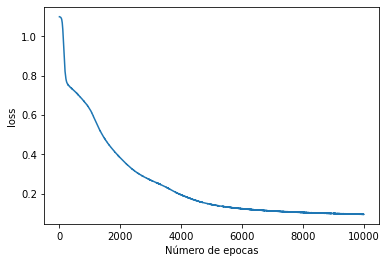

In [32]:
plt.xlabel('Número de epocas')
plt.ylabel('loss')
plt.plot(history.history['loss'])

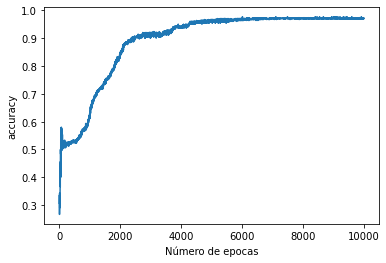

In [33]:
plt.xlabel('Número de epocas')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'])

# Ejercicios

En la siguiente sección deberas entrenar la red neuronal específicada con el dataset mencionado

## Ejercicio 1 (6 puntos)
Construir un modelo de red neuronal de 3 capas: relu, relu, sigmoid para el dataset 03. Con un número de neuronas de salida por cada capa de: 10,5,1. Además de un learning rate de 0.01, entrenado con Mini Batch Gradient Descent de 32 de batch size. 

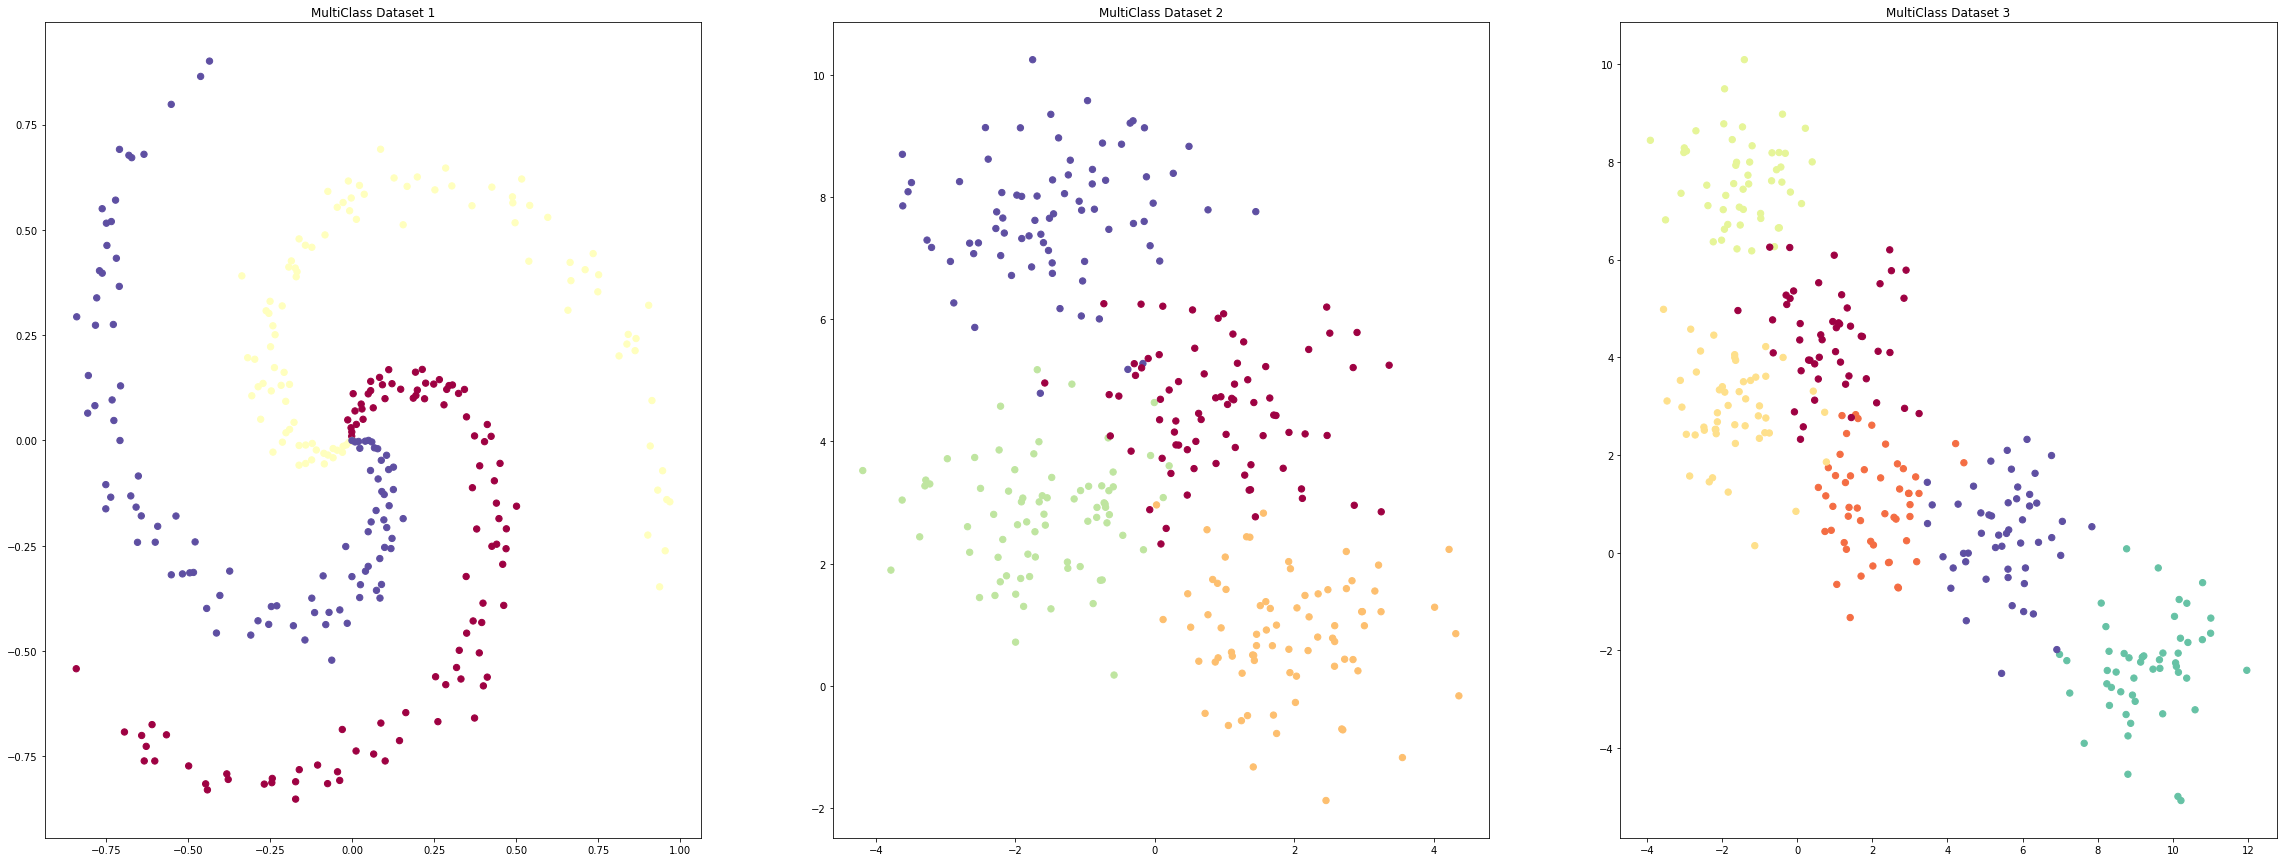

In [33]:
plot_n_m_images([ds_multi_1, ds_multi_2, ds_multi_3],
             ['MultiClass Dataset 1', 'MultiClass Dataset 2', 'MultiClass Dataset 3'],
             figx=40, figy=15, n=1, m=3)



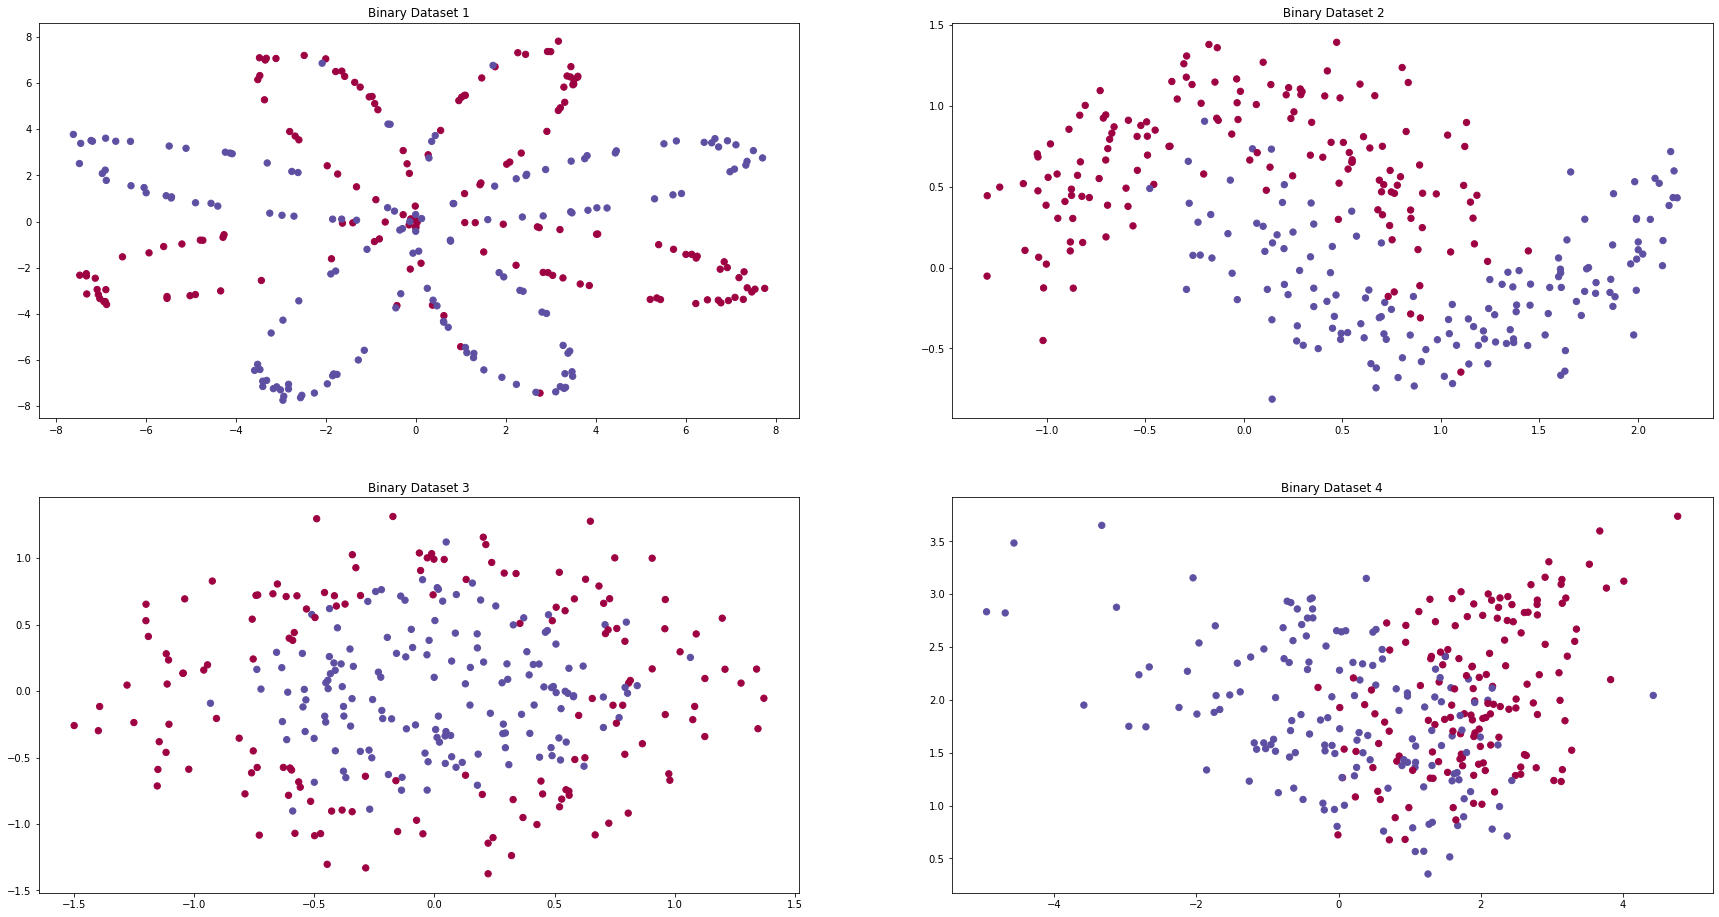

In [45]:
plot_n_m_images([ds_binary_1, ds_binary_2, ds_binary_3, ds_binary_4],
             ['Binary Dataset 1', ' Binary Dataset 2', 'Binary Dataset 3', 'Binary Dataset 4'],
             figx=30, figy=16,n=2,m=2)

In [46]:
model_multiclass = tf.keras.Sequential()

In [47]:
model_multiclass.add(tf.keras.layers.Dense(units=10  ,
                                          input_dim=2,
                                          use_bias=True,
                                          kernel_initializer='uniform', 
                                          bias_initializer='zeros',
                                          activation='relu'))           # activation=tf.nn.tanh
model_multiclass.add(tf.keras.layers.Dense(units=5,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='relu'))       # activation=tf.nn.softmax  

model_multiclass.add(tf.keras.layers.Dense(units=1,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='sigmoid'))       # activation=tf.nn.softmax    

In [50]:
#y_onehot_encoding = tf.keras.backend.one_hot(np.ravel(ds_multi_3[1]), 6).numpy() # conversión one hot encoding
#ds_binary_3[1]

In [51]:
model_multiclass.compile(loss=tf.keras.losses.binary_crossentropy,
                        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                        metrics=['accuracy'])

In [54]:
history = model_multiclass.fit(x=ds_binary_3[0],
                     y=ds_binary_3[1],
                     batch_size=32,
                     epochs=5000,
                     verbose=0)
print("Finished training the model, epoch:%d, loss:%f , accuracy:%f"%(5000,
                                                                      history.history['loss'][-1],
                                                                      history.history['accuracy'][-1]))     


Finished training the model, epoch:5000, loss:0.250938 , accuracy:0.896667


dict_keys(['loss', 'accuracy'])


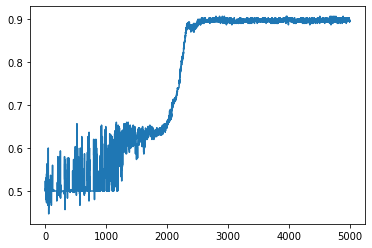

In [55]:

print(history.history.keys())
plt.plot(history.history['accuracy'])

In [ ]:
#Como podemos ver solo es necesario 2500 iteraciones

In [56]:
a_test = ds_binary_3[0][1]
# print(a_test)
print(ds_binary_3[0][2:5])
print(model_multiclass.predict(ds_binary_3[0][2:3]))
print(model_multiclass.predict([[0.11534148,-1.80667995]]))

[[ 0.03443324  0.67743528]
 [-0.15765601  0.28441335]
 [-0.28563971 -1.33075769]]
[[0.91852826]]
[[0.00030271]]


## Ejercicio 2 (6 puntos)
Construir un modelo de red neuronal de 3 capas: tanh, tanh, sigmoid para el dataset 03. Con un número de neuronas de salida por cada capa de: 10,5,1. Además de un learning rate de 0.01, entrenado con Mini Batch Gradient Descent con Mometum de 32 de batch size.

In [64]:
model_multiclass = tf.keras.Sequential()
model_multiclass.add(tf.keras.layers.Dense(units=10  ,
                                          input_dim=2,
                                          use_bias=True,
                                          kernel_initializer='uniform', 
                                          bias_initializer='zeros',
                                          activation='tanh'))           # activation=tf.nn.tanh
model_multiclass.add(tf.keras.layers.Dense(units=5,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='tanh'))       # activation=tf.nn.softmax  

model_multiclass.add(tf.keras.layers.Dense(units=1,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='sigmoid'))       # activation=tf.nn.softmax    







In [68]:
model_multiclass.compile(loss=tf.keras.losses.binary_crossentropy,
                        optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                        metrics=['accuracy'])

In [69]:
history = model_multiclass.fit(x=ds_binary_3[0],
                     y=ds_binary_3[1],
                     batch_size=32,
                     epochs=2500,
                     verbose=0)
print("Finished training the model, epoch:%d, loss:%f , accuracy:%f"%(2500,  history.history['loss'][-1],                                         history.history['accuracy'][-1]))  



Finished training the model, epoch:2500, loss:0.241828 , accuracy:0.910000


dict_keys(['loss', 'accuracy'])


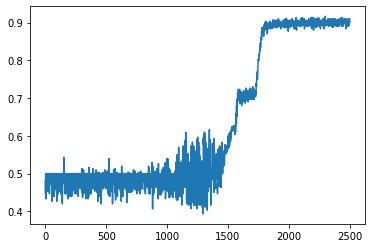

In [70]:
print(history.history.keys())
plt.plot(history.history['accuracy'])

In [ ]:
#NOTA: Si el learning rate le ponemos: 00.1, el resultado se va a quedar siempre en 0.5 ty si le ponemos en 0.1 llega el accuracyu a 0.91

## Ejercicio 3 (6 puntos)
Construir un modelo de red neuronal de 4 capas: relu, relu, tahn, tanh, sigmoid para el dataset 04. Con un número de neuronas de salida por cada capa de: 10,5, 5, 3, 3, 1. Además de un learning rate de 0.05, entrenado con AdaGrad. 

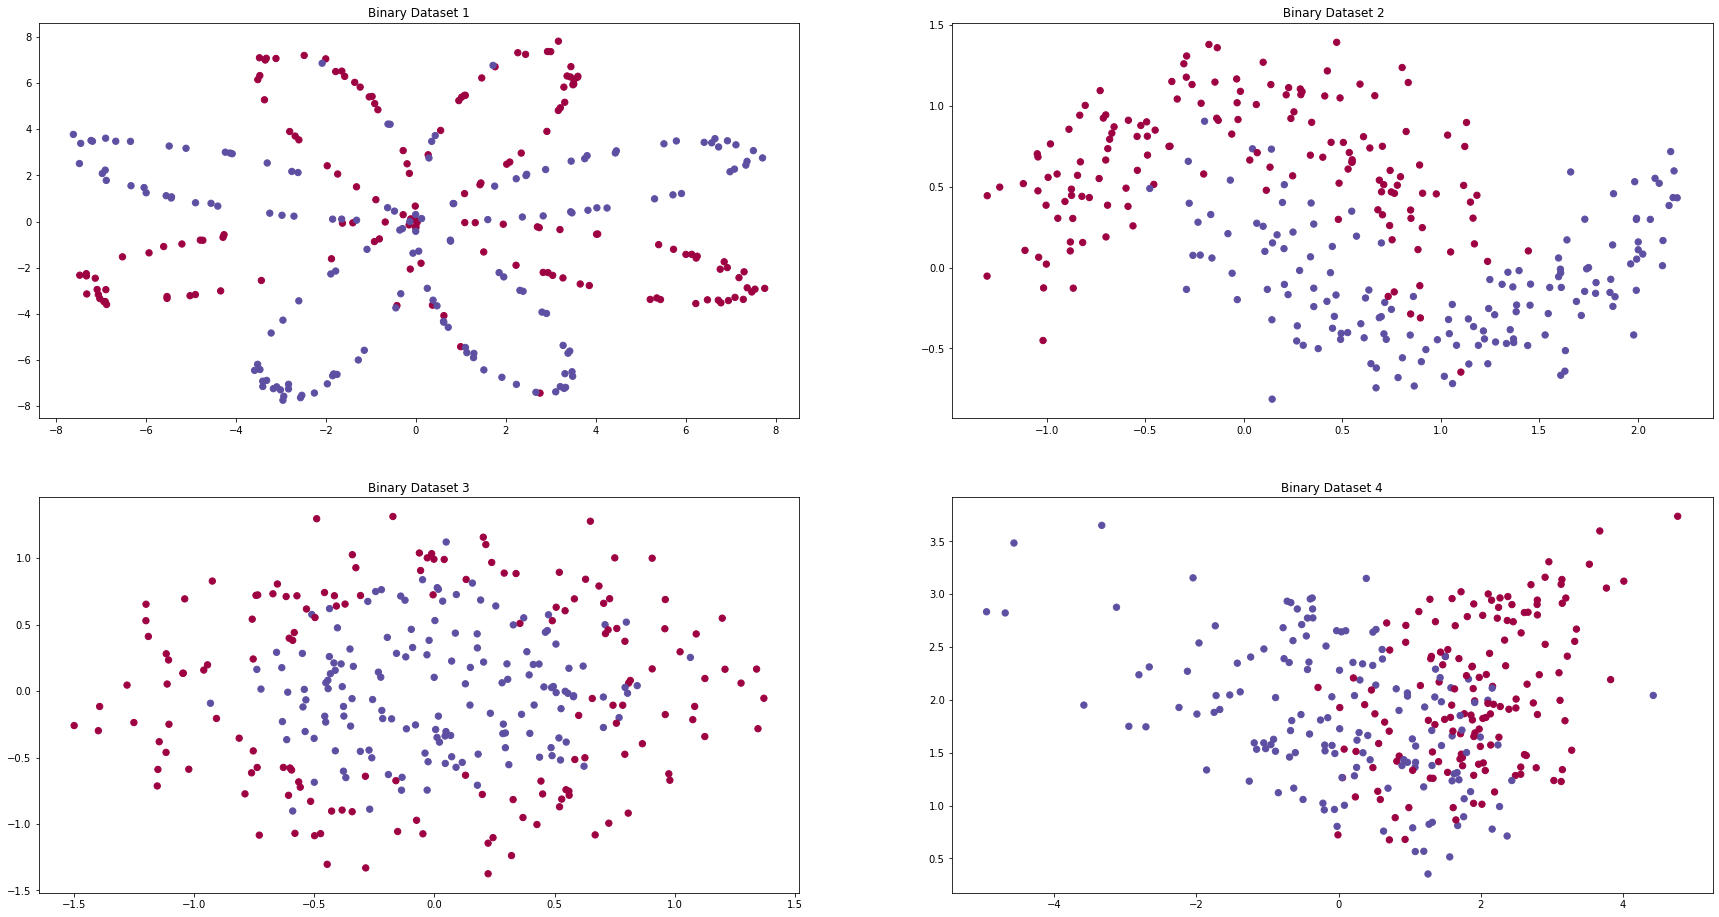

In [147]:
# 4 capas: relu relu tang sig 10,5,3,1
plot_n_m_images([ds_binary_1, ds_binary_2, ds_binary_3, ds_binary_4],
             ['Binary Dataset 1', ' Binary Dataset 2', 'Binary Dataset 3', 'Binary Dataset 4'],
             figx=30, figy=16,n=2,m=2)

In [148]:
data4=load_dataset_4()


In [150]:
model_multiclass = tf.keras.Sequential()
model_multiclass.add(tf.keras.layers.Dense(units=10  ,
                                          input_dim=2,
                                          use_bias=True,
                                          kernel_initializer='uniform', 
                                          bias_initializer='zeros',
                                          activation='relu'))           # activation=tf.nn.tanh
model_multiclass.add(tf.keras.layers.Dense(units=5,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='relu'))       # activation=tf.nn.softmax  

model_multiclass.add(tf.keras.layers.Dense(units=3,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='tanh'))       # activation=tf.nn.softmax   

model_multiclass.add(tf.keras.layers.Dense(units=1,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='sigmoid'))       # activation=tf.nn.softmax 




In [151]:

model_multiclass.compile(loss=tf.keras.losses.binary_crossentropy,
                        optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.05),
                        metrics=['accuracy'])



In [152]:
history = model_multiclass.fit(x=data4[0],
                     y=data4[1],
                     batch_size=32,
                     epochs=1500,
                     verbose=0)
print("Finished training the model, epoch:%d, loss:%f , accuracy:%f"%(1500,  history.history['loss'][-1],                                         history.history['accuracy'][-1]))  




Finished training the model, epoch:1500, loss:0.693170 , accuracy:0.500000


dict_keys(['loss', 'accuracy'])


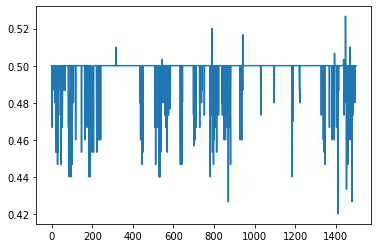

In [153]:
print(history.history.keys())
plt.plot(history.history['accuracy'])

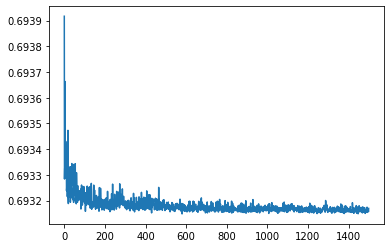

In [154]:
plt.plot(history.history['loss'])

## Ejercicio 4 (6 puntos)
Construir un modelo de red neuronal de 5 capas: relu, relu, relu, relu, sigmoid para el dataset 04. Con un número de neuronas de salida por cada capa de: 10,7,5,3,1. Además de un learning rate de 0.001, entrenado con RMSProp. 

In [96]:
model_multiclass = tf.keras.Sequential()
model_multiclass.add(tf.keras.layers.Dense(units=10  ,
                                          input_dim=2,
                                          use_bias=True,
                                          kernel_initializer='uniform', 
                                          bias_initializer='zeros',
                                          activation='relu'))           # activation=tf.nn.tanh
model_multiclass.add(tf.keras.layers.Dense(units=7,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='relu'))       # activation=tf.nn.softmax  
model_multiclass.add(tf.keras.layers.Dense(units=5,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='relu'))       # activation=tf.nn.softmax  
model_multiclass.add(tf.keras.layers.Dense(units=3,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='relu'))       # activation=tf.nn.softmax  

model_multiclass.add(tf.keras.layers.Dense(units=1,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='sigmoid'))       # activation=tf.nn.softmax    



In [97]:

model_multiclass.compile(loss=tf.keras.losses.binary_crossentropy,
                        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                        metrics=['accuracy'])

In [102]:

history = model_multiclass.fit(x=ds_binary_4[0],
                     y=ds_binary_4[1],
                     batch_size=32,
                     epochs=1500,
                     verbose=0)
print("Finished training the model, epoch:%d, loss:%f , accuracy:%f"%(1500,  history.history['loss'][-1],                                         history.history['accuracy'][-1]))  




Finished training the model, epoch:1500, loss:3294887.750000 , accuracy:0.500000


dict_keys(['loss', 'accuracy'])


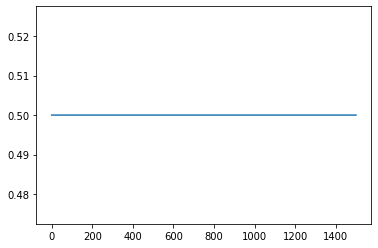

In [103]:
print(history.history.keys())
plt.plot(history.history['accuracy'])

## Ejercicio 5 (6 puntos)
Construir un modelo de red neuronal de 5 capas: relu, relu, relu, relu, sigmoid para el dataset 05. Con un número de neuronas de salida por cada capa de: 10,7,5,3,1. Además de un learning rate de 0.02, entrenado con ADAM. 

In [105]:
data5 =  load_dataset_5()


In [106]:
model_multiclass = tf.keras.Sequential()
model_multiclass.add(tf.keras.layers.Dense(units=10  ,
                                          input_dim=2,
                                          use_bias=True,
                                          kernel_initializer='uniform', 
                                          bias_initializer='zeros',
                                          activation='relu'))           # activation=tf.nn.tanh
model_multiclass.add(tf.keras.layers.Dense(units=7,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='relu'))       # activation=tf.nn.softmax  
model_multiclass.add(tf.keras.layers.Dense(units=5,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='relu'))       # activation=tf.nn.softmax  
model_multiclass.add(tf.keras.layers.Dense(units=3,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='relu'))       # activation=tf.nn.softmax  

model_multiclass.add(tf.keras.layers.Dense(units=1,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='sigmoid'))       # activation=tf.nn.softmax    



In [107]:
model_multiclass.compile(loss=tf.keras.losses.binary_crossentropy,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                        metrics=['accuracy'])



In [108]:

history = model_multiclass.fit(x=data5[0],
                     y=data5[1],
                     batch_size=32,
                     epochs=1000,
                     verbose=0)

In [109]:
print("Finished training the model, epoch:%d, loss:%f , accuracy:%f"%(1000,  history.history['loss'][-1],                                         history.history['accuracy'][-1]))  



Finished training the model, epoch:1000, loss:0.693460 , accuracy:0.500000


dict_keys(['loss', 'accuracy'])


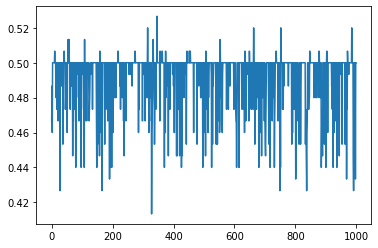

In [110]:
print(history.history.keys())
plt.plot(history.history['accuracy'])

## Ejercicio 6 (6 puntos)
Construir un modelo de red neuronal de 2 capas: relu, softmax para el dataset 06 (multiclass clasification). Con un número de neuronas de salida por cada capa de: 10,3. Además de un learning rate de 0.01, entrenado con ADAM. 

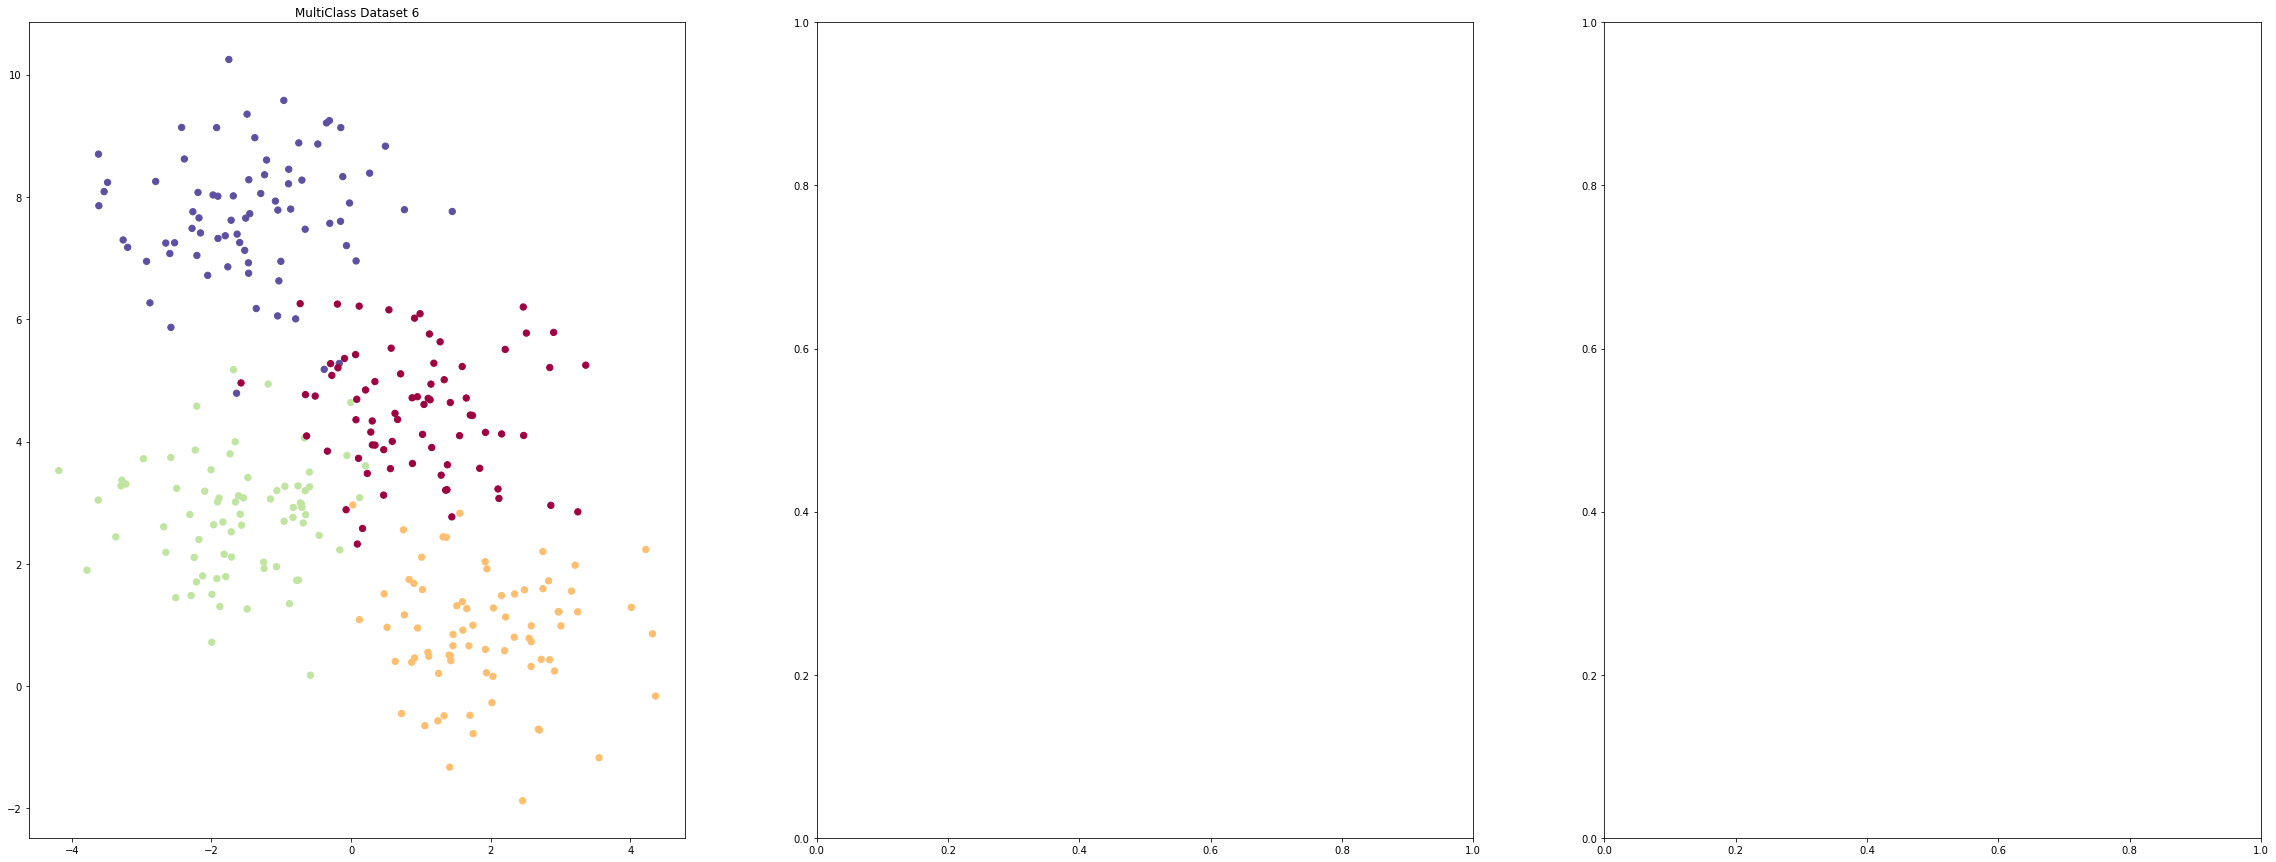

In [36]:
data6 = load_dataset_6()
plot_n_m_images([data6],
             ['MultiClass Dataset 6'],
             figx=40, figy=15, n=1, m=3)

In [59]:
model_multiclass = 0
model_multiclass = tf.keras.Sequential()

In [60]:
(data6[0]).shape

(300, 2)

In [61]:

model_multiclass.add(tf.keras.layers.Dense(units=10  ,
                                          input_dim=2,
                                          use_bias=True,
                                          kernel_initializer='uniform', 
                                          bias_initializer='zeros',
                                          activation='relu'))           # activation=tf.nn.tanh
model_multiclass.add(tf.keras.layers.Dense(units=3,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='softmax'))       # activation=tf.nn.softmax  


In [62]:
model_multiclass.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 33        
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


In [63]:

model_multiclass.compile(loss=tf.keras.losses.categorical_crossentropy,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=['accuracy'])


In [64]:
y_onehot_encoding = tf.keras.backend.one_hot(np.ravel(data6[1]), 3).numpy() # conversión one hot encoding


In [54]:
#data6[0].shape
#data6[1]
#y_onehot_encoding

In [65]:
history = model_multiclass.fit(x=data6[0],
                     y=y_onehot_encoding,
                     batch_size=32,
                     epochs=1000,
                     verbose=0)
print("Finished training the model, epoch:%d, loss:%f , accuracy:%f"%(1000,  
                                                                      history.history['loss'][-1],
                                                                      history.history['accuracy'][-1]))

Finished training the model, epoch:1000, loss:1.296188 , accuracy:0.683333


dict_keys(['loss', 'accuracy'])


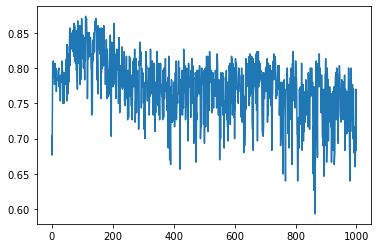

In [67]:
print(history.history.keys())
plt.plot(history.history['accuracy'])

## Ejercicio 7 (6 puntos)
Construir un modelo de red neuronal de 3 capas: tanh, tanh, softmax para el dataset 07 (multiclass clasification). Con un número de neuronas de salida por cada capa de: 10, 5, 3. Además de un learning rate de 0.01, entrenado con ADAM. 

In [76]:
data7 = load_dataset_7()

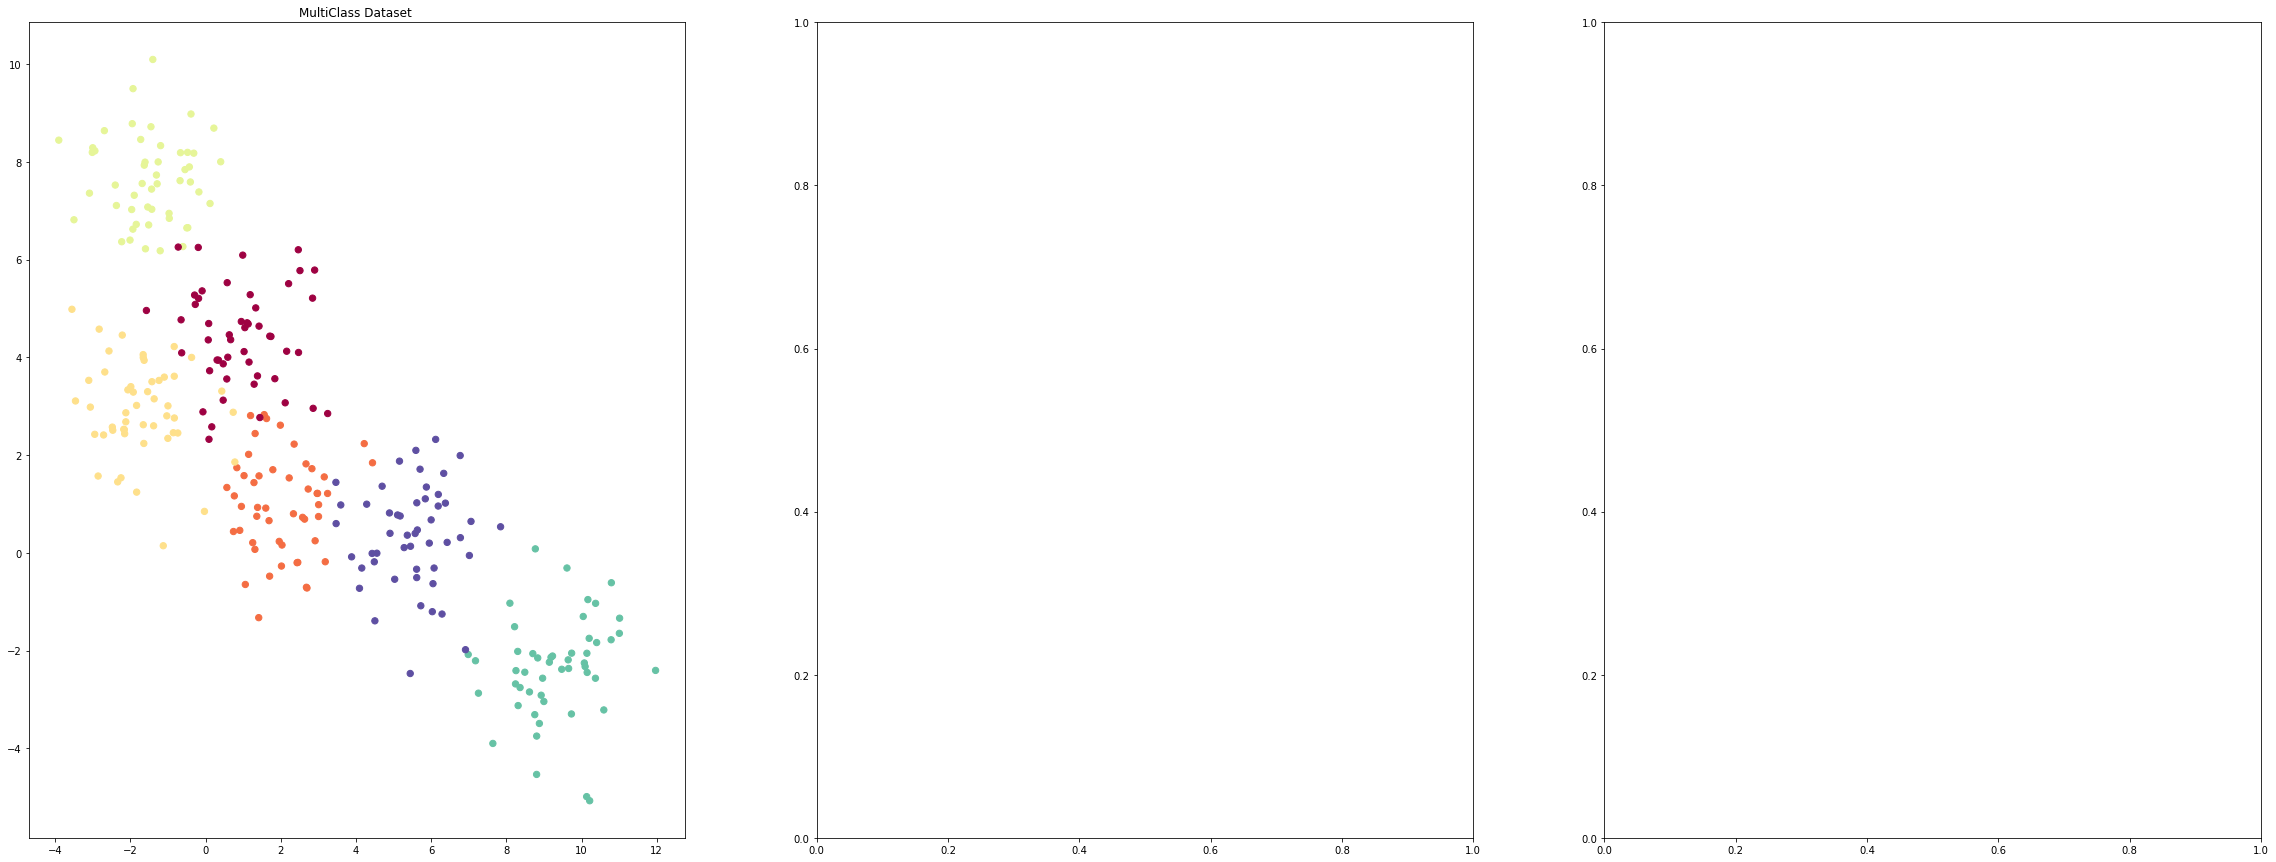

In [77]:
plot_n_m_images([data7],
             ['MultiClass Dataset '],
             figx=40, figy=15, n=1, m=3)


In [78]:
(data7[0]).shape

(300, 2)

In [79]:
model_multiclass=0
model_multiclass = tf.keras.Sequential()
model_multiclass.add(tf.keras.layers.Dense(units=10  ,
                                          input_dim=2,
                                          use_bias=True,
                                          kernel_initializer='uniform', 
                                          bias_initializer='zeros',
                                          activation='tanh'))           # activation=tf.nn.tanh
model_multiclass.add(tf.keras.layers.Dense(units=5,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='tanh'))       # activation=tf.nn.softmax  

model_multiclass.add(tf.keras.layers.Dense(units=6,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='softmax'))       # activation=tf.nn.softmax    

In [80]:
model_multiclass.compile(loss=tf.keras.losses.categorical_crossentropy,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=['accuracy'])

In [81]:
y_onehot_encoding = tf.keras.backend.one_hot(np.ravel(data7[1]), 6).numpy() # conversión one hot encoding

In [82]:
data7[0].shape

(300, 2)

In [83]:
history = model_multiclass.fit(x=data7[0],
                     y=y_onehot_encoding,
                     batch_size=32,
                     epochs=1000,
                     verbose=0)


In [84]:
print("Finished training the model, epoch:%d, loss:%f , accuracy:%f"%(1000,  history.history['loss'][-1],                                         history.history['accuracy'][-1]))  



Finished training the model, epoch:1000, loss:0.083645 , accuracy:0.966667


dict_keys(['loss', 'accuracy'])


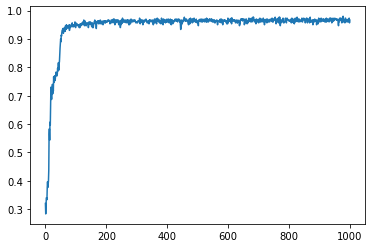

In [85]:
print(history.history.keys())
plt.plot(history.history['accuracy'])

## Ejercicio 8 (6 puntos)
Construir un modelo de red neuronal de 4 capas: relu, tanh, softmax para el dataset 07 (multiclass clasification). Con un número de neuronas de salida por cada capa de: 10, 5, 5, 4. Además de un learning rate de 0.01, entrenado con AdaDelta. 

In [86]:
data7 = load_dataset_7()

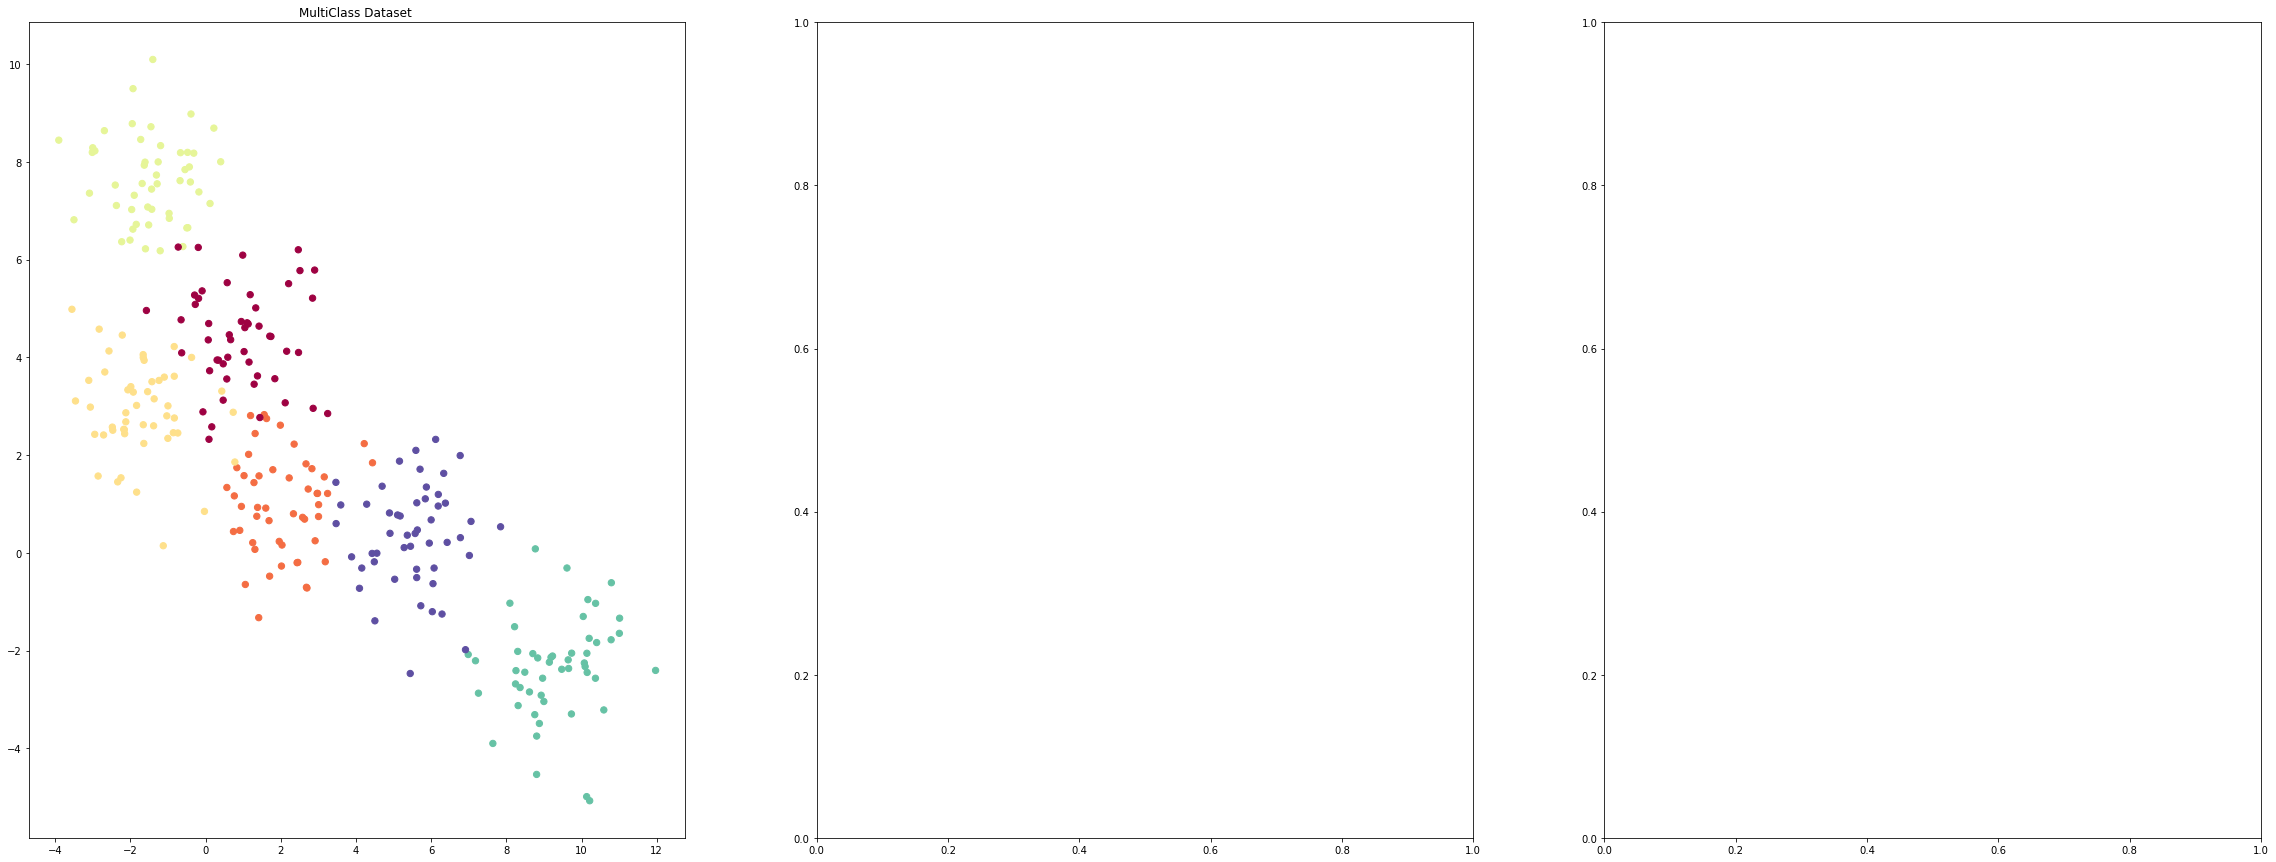

In [87]:
plot_n_m_images([data7],
             ['MultiClass Dataset '],
             figx=40, figy=15, n=1, m=3)

In [88]:
(data7[0]).shape

(300, 2)

In [89]:
model_multiclass=0
model_multiclass = tf.keras.Sequential()
model_multiclass.add(tf.keras.layers.Dense(units=10  ,
                                          input_dim=2,
                                          use_bias=True,
                                          kernel_initializer='uniform', 
                                          bias_initializer='zeros',
                                          activation='relu'))           # activation=tf.nn.tanh
model_multiclass.add(tf.keras.layers.Dense(units=5,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='relu'))       # activation=tf.nn.softmax  

model_multiclass.add(tf.keras.layers.Dense(units=5,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='tanh'))       # activation=tf.nn.softmax    
model_multiclass.add(tf.keras.layers.Dense(units=6,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='softmax'))       # activation=tf.nn.softmax  

model_multiclass.compile(loss=tf.keras.losses.categorical_crossentropy,
                        optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.01),
                        metrics=['accuracy'])


In [90]:
y_onehot_encoding = tf.keras.backend.one_hot(np.ravel(data7[1]), 6).numpy() # conversión one hot encoding

In [105]:
data7[0].shape

(300, 2)

In [92]:
history = model_multiclass.fit(x=data7[0],
                     y=y_onehot_encoding,
                     batch_size=32,
                     epochs=1000,
                     verbose=0)


In [93]:
print("Finished training the model, epoch:%d, loss:%f , accuracy:%f"%(1000,  history.history['loss'][-1],                                         history.history['accuracy'][-1]))  



Finished training the model, epoch:1000, loss:1.791695 , accuracy:0.266667


dict_keys(['loss', 'accuracy'])


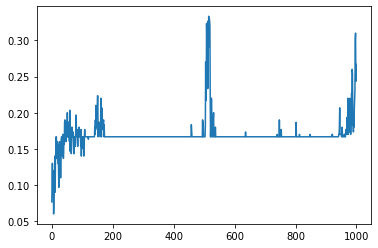

In [96]:
print(history.history.keys())
plt.plot(history.history['accuracy'])

## Ejercicio 9 (6 puntos)
Construir varios modelos de red neuronal de 4 capas: relu, relu, relu, tanh, sigmoid para el dataset 05. Con un número de neuronas de salida por cada capa de: 10, 5, 5, 3, 1. Además de un learning rate de 0.01. Entrenado con un Mini Batch Gradient Descent, Mometum, AdaGrad, RMS Prop, y ADAM. Plotea los resultados de la función de perdida y la accuracy. Utilizar el mismo número de epocas par cada dataset.

In [97]:
data5 = load_dataset_5()

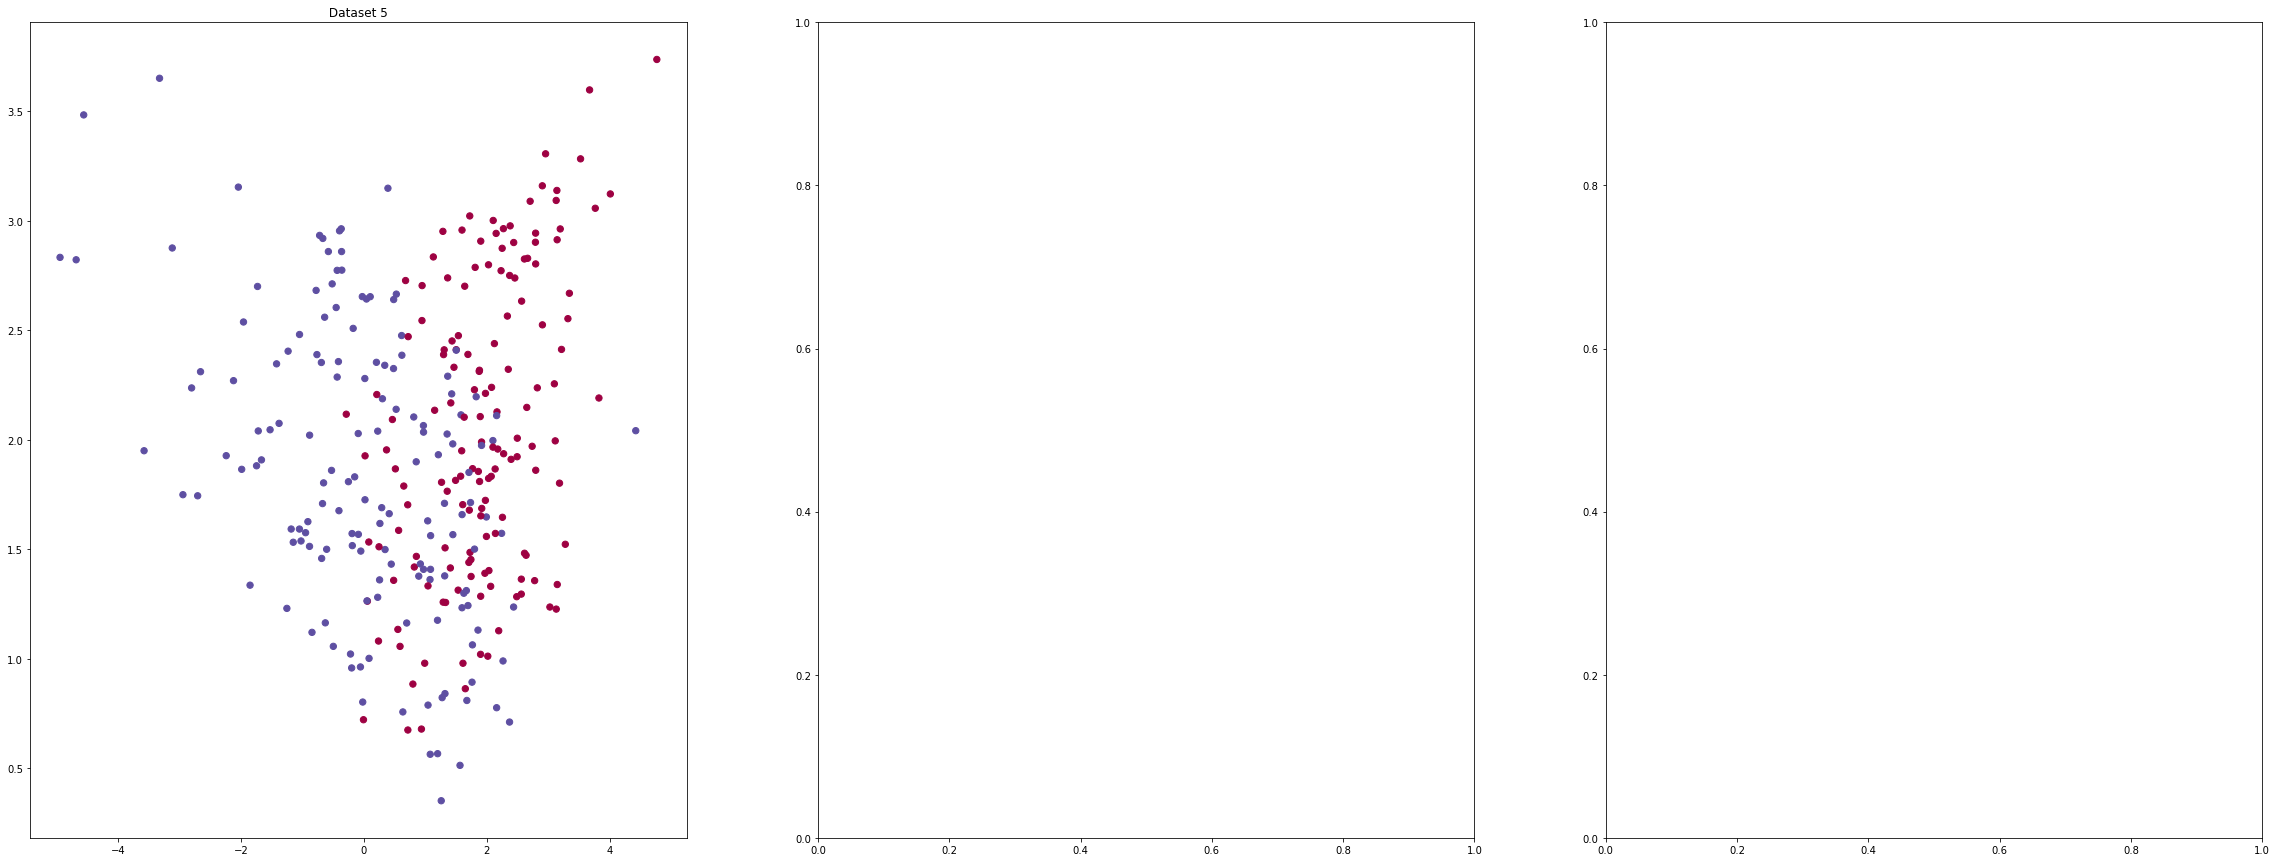

In [98]:
plot_n_m_images([data5],
             [' Dataset 5 '],
             figx=40, figy=15, n=1, m=3)


In [100]:
data5[0].shape

(300, 2)

In [106]:
model_multiclass=0
model_multiclass = tf.keras.Sequential()
model_multiclass.add(tf.keras.layers.Dense(units=10  ,
                                          input_dim=2,
                                          use_bias=True,
                                          kernel_initializer='uniform', 
                                          bias_initializer='zeros',
                                          activation='relu'))           # activation=tf.nn.tanh
model_multiclass.add(tf.keras.layers.Dense(units=5,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='relu'))       # activation=tf.nn.softmax  
model_multiclass.add(tf.keras.layers.Dense(units=5,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='relu'))       # activation=tf.nn.softmax 

model_multiclass.add(tf.keras.layers.Dense(units=3,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='tanh'))       # activation=tf.nn.softmax    

In [107]:
model_multiclass.compile(loss=tf.keras.losses.binary_crossentropy,
                        optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01),
                        metrics=['accuracy'])
#y_onehot_encoding = tf.keras.backend.one_hot(np.ravel(data6[1]), 4).numpy() # conversión one hot encoding

Finished training the model, epoch:1000, loss:0.420388 , accuracy:0.200000
dict_keys(['loss', 'accuracy'])


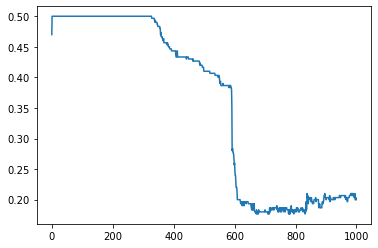

In [108]:
history = model_multiclass.fit(x=data5[0],
                     y=data5[1],
                     batch_size=32,
                     epochs=1000,
                     verbose=0)
print("Finished training the model, epoch:%d, loss:%f , accuracy:%f"%(1000,  history.history['loss'][-1],                                         history.history['accuracy'][-1]))  


print(history.history.keys())
plt.plot(history.history['accuracy'])

In [109]:
model_multiclass.compile(loss=tf.keras.losses.binary_crossentropy,
                        optimizer=tf.keras.optimizers.SGD(name='momentum',learning_rate=0.01),
                        metrics=['accuracy'])
#y_onehot_encoding = tf.keras.backend.one_hot(np.ravel(data6[1]), 4).numpy() # conversión one hot encoding

Finished training the model, epoch:1000, loss:0.391516 , accuracy:0.240000
dict_keys(['loss', 'accuracy'])


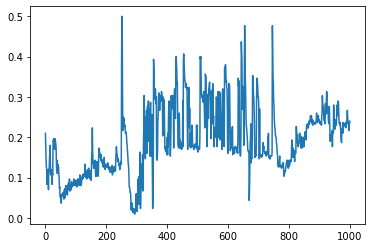

In [110]:
history = model_multiclass.fit(x=data5[0],
                     y=data5[1],
                     batch_size=32,
                     epochs=1000,
                     verbose=0)
print("Finished training the model, epoch:%d, loss:%f , accuracy:%f"%(1000,  history.history['loss'][-1],                                         history.history['accuracy'][-1]))  


print(history.history.keys())
plt.plot(history.history['accuracy'])

In [111]:
model_multiclass.compile(loss=tf.keras.losses.binary_crossentropy,
                        optimizer=tf.keras.optimizers.RMSprop(name='RMSprop',learning_rate=0.01),
                        metrics=['accuracy'])
#y_onehot_encoding = tf.keras.backend.one_hot(np.ravel(data6[1]), 4).numpy() # conversión one hot encoding

Finished training the model, epoch:1000, loss:0.348235 , accuracy:0.173333
dict_keys(['loss', 'accuracy'])


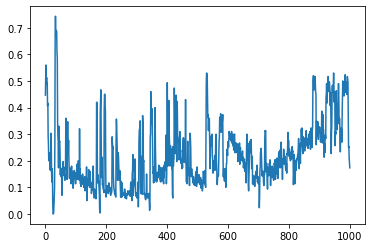

In [112]:
history = model_multiclass.fit(x=data5[0],
                     y=data5[1],
                     batch_size=32,
                     epochs=1000,
                     verbose=0)
print("Finished training the model, epoch:%d, loss:%f , accuracy:%f"%(1000,  history.history['loss'][-1],                                         history.history['accuracy'][-1]))  


print(history.history.keys())
plt.plot(history.history['accuracy'])

In [113]:
model_multiclass.compile(loss=tf.keras.losses.binary_crossentropy,
                        optimizer=tf.keras.optimizers.Adam(name='Adam',learning_rate=0.01),
                        metrics=['accuracy'])
#y_onehot_encoding = tf.keras.backend.one_hot(np.ravel(data6[1]), 4).numpy() # conversión one hot encoding

Finished training the model, epoch:1000, loss:0.365728 , accuracy:0.500000
dict_keys(['loss', 'accuracy'])


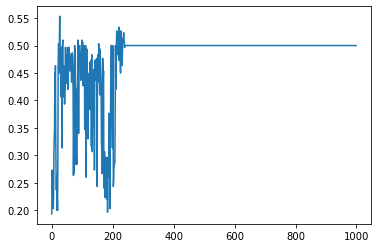

In [114]:
history = model_multiclass.fit(x=data5[0],
                     y=data5[1],
                     batch_size=32,
                     epochs=1000,
                     verbose=0)
print("Finished training the model, epoch:%d, loss:%f , accuracy:%f"%(1000,  history.history['loss'][-1],                                         history.history['accuracy'][-1]))  


print(history.history.keys())
plt.plot(history.history['accuracy'])

## Ejercicio 10 (6 puntos)
Construir varios modelos de red neuronal de 5 capas: relu, relu, relu, relu, softmax para el dataset 07. Con un número de neuronas de salida por cada capa de: 7, 5, 5, 3, 1. Además de un learning rate de 0.01. Entrenado con un Mini Batch Gradient Descent, Mometum, AdaGrad, RMS Prop, y ADAM. Plotea los resultados de la función de perdida y la accuracy. Utilizar el mismo número de epocas par cada dataset.

In [115]:
data7= load_dataset_7()

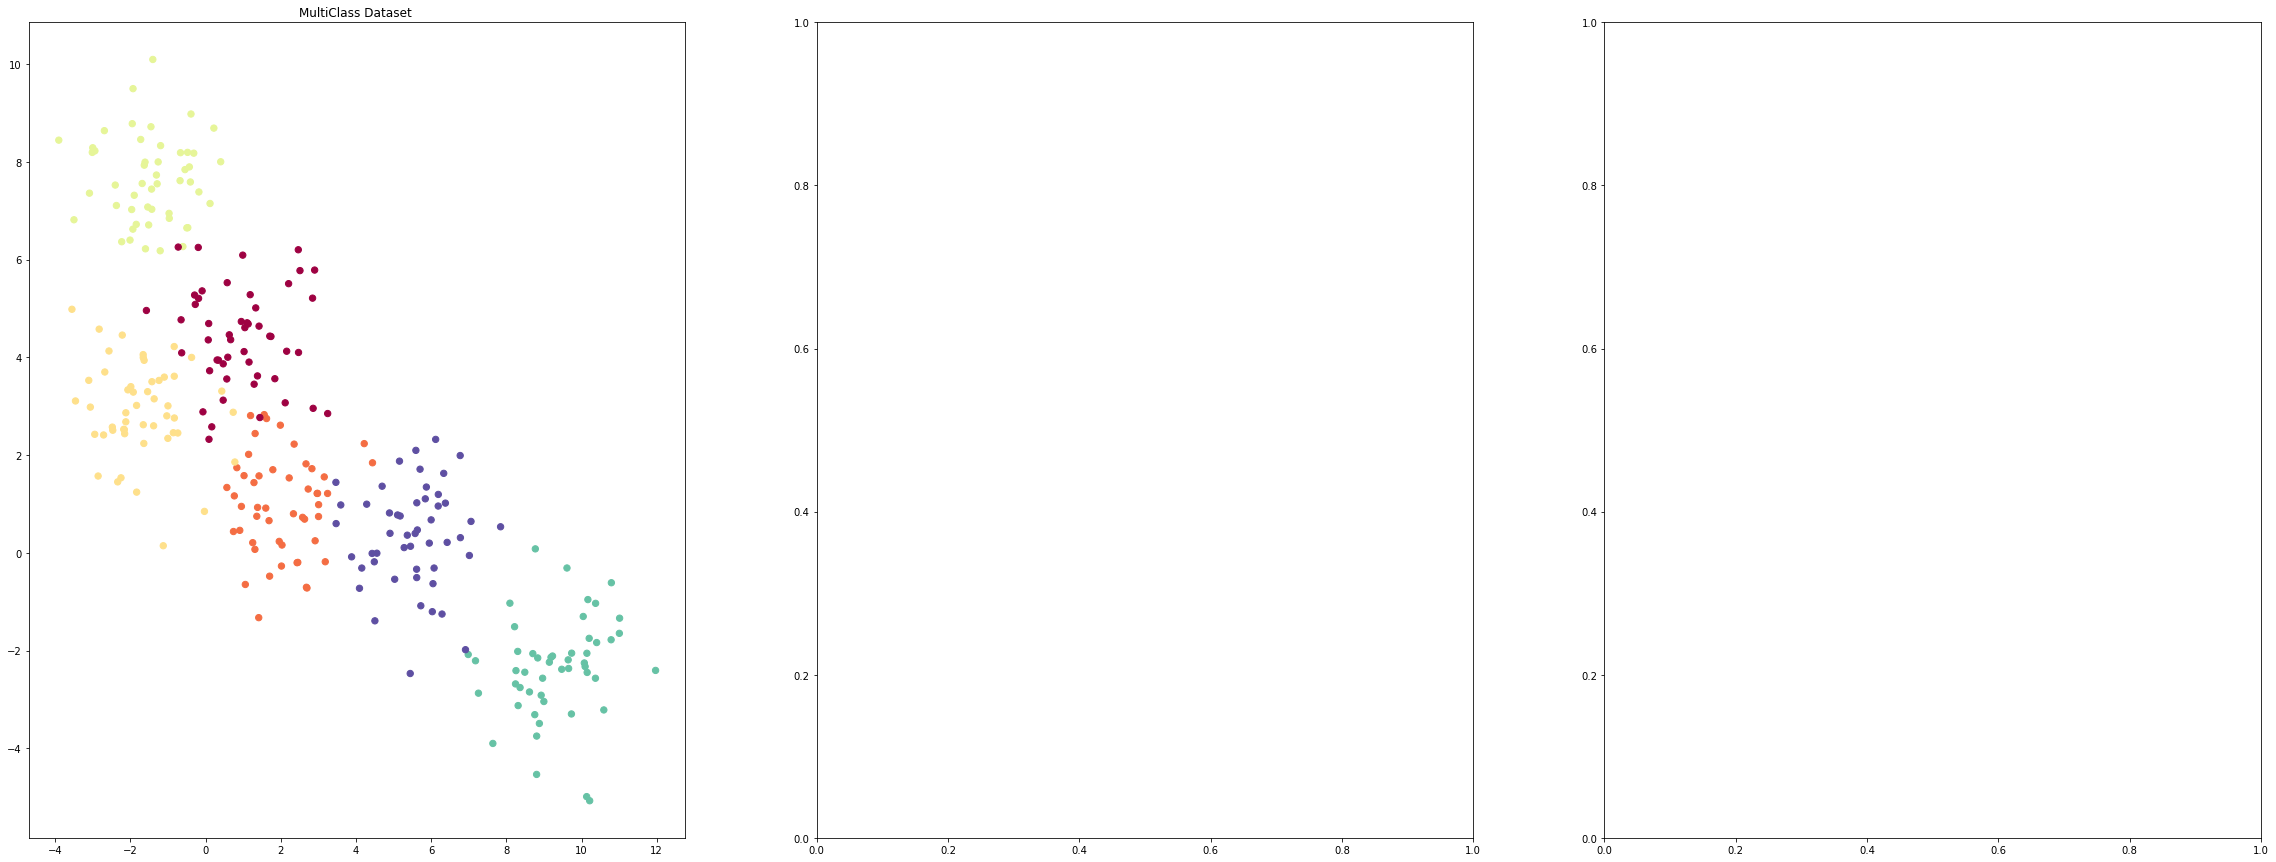

In [116]:
plot_n_m_images([data7],
             ['MultiClass Dataset '],
             figx=40, figy=15, n=1, m=3)

In [117]:
data7[0].shape

(300, 2)

In [120]:
model_multiclass=0
model_multiclass = tf.keras.Sequential()
model_multiclass.add(tf.keras.layers.Dense(units=7  ,
                                          input_dim=2,
                                          use_bias=True,
                                          kernel_initializer='uniform', 
                                          bias_initializer='zeros',
                                          activation='relu'))           # activation=tf.nn.tanh
model_multiclass.add(tf.keras.layers.Dense(units=5,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='relu'))       # activation=tf.nn.softmax  

model_multiclass.add(tf.keras.layers.Dense(units=5,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='relu'))       # activation=tf.nn.softmax    
model_multiclass.add(tf.keras.layers.Dense(units=3,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='relu'))       # activation=tf.nn.softmax  
model_multiclass.add(tf.keras.layers.Dense(units=6,
                                           use_bias=True,
                                           kernel_initializer='uniform',
                                           bias_initializer='zeros',
                                           activation='softmax'))       # activation=tf.nn.softmax  

In [121]:
y_onehot_encoding = tf.keras.backend.one_hot(np.ravel(data7[1]), 6).numpy() # conversión one hot encoding

Finished training the model, epoch:1000, loss:1.791882 , accuracy:0.166667
dict_keys(['loss', 'accuracy'])


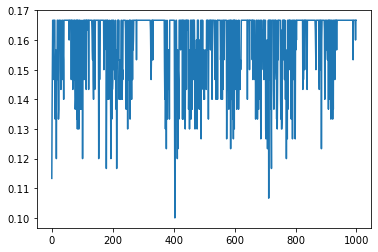

In [123]:
model_multiclass.compile(loss=tf.keras.losses.categorical_crossentropy,
                        optimizer=tf.keras.optimizers.SGD(name='momentum',learning_rate=0.01),
                        metrics=['accuracy'])

history = model_multiclass.fit(x=data7[0],
                     y=y_onehot_encoding,
                     batch_size=32,
                     epochs=1000,
                     verbose=0)
print("Finished training the model, epoch:%d, loss:%f , accuracy:%f"%(1000,  history.history['loss'][-1],                                         history.history['accuracy'][-1]))  


print(history.history.keys())
plt.plot(history.history['accuracy'])

Finished training the model, epoch:1000, loss:1.791777 , accuracy:0.166667
dict_keys(['loss', 'accuracy'])


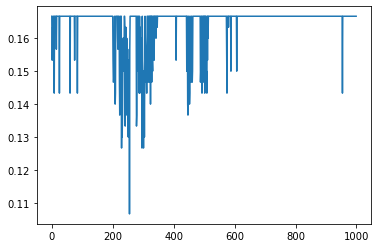

In [124]:
model_multiclass.compile(loss=tf.keras.losses.categorical_crossentropy,
                        optimizer=tf.keras.optimizers.Adagrad(name='Adagrad',learning_rate=0.01),
                        metrics=['accuracy'])

history = model_multiclass.fit(x=data7[0],
                     y=y_onehot_encoding,
                     batch_size=32,
                     epochs=1000,
                     verbose=0)
print("Finished training the model, epoch:%d, loss:%f , accuracy:%f"%(1000,  history.history['loss'][-1],                                         history.history['accuracy'][-1]))  


print(history.history.keys())
plt.plot(history.history['accuracy'])

Finished training the model, epoch:1000, loss:1.793285 , accuracy:0.143333
dict_keys(['loss', 'accuracy'])


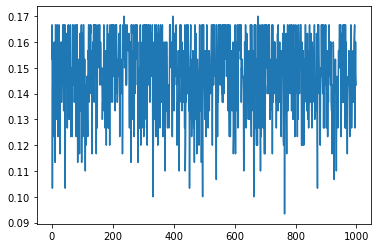

In [125]:
model_multiclass.compile(loss=tf.keras.losses.categorical_crossentropy,
                        optimizer=tf.keras.optimizers.RMSprop(name='RMSprop',learning_rate=0.01),
                        metrics=['accuracy'])

history = model_multiclass.fit(x=data7[0],
                     y=y_onehot_encoding,
                     batch_size=32,
                     epochs=1000,
                     verbose=0)
print("Finished training the model, epoch:%d, loss:%f , accuracy:%f"%(1000,  history.history['loss'][-1],                                         history.history['accuracy'][-1]))  


print(history.history.keys())
plt.plot(history.history['accuracy'])

Finished training the model, epoch:1000, loss:1.792327 , accuracy:0.166667
dict_keys(['loss', 'accuracy'])


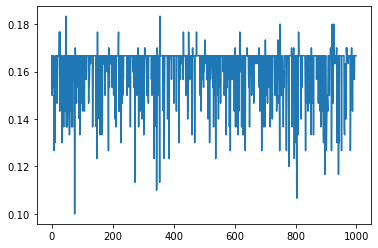

In [126]:
model_multiclass.compile(loss=tf.keras.losses.categorical_crossentropy,
                        optimizer=tf.keras.optimizers.Adam(name='Adam',learning_rate=0.01),
                        metrics=['accuracy'])

history = model_multiclass.fit(x=data7[0],
                     y=y_onehot_encoding,
                     batch_size=32,
                     epochs=1000,
                     verbose=0)
print("Finished training the model, epoch:%d, loss:%f , accuracy:%f"%(1000,  history.history['loss'][-1],                                         history.history['accuracy'][-1]))  


print(history.history.keys())
plt.plot(history.history['accuracy'])

## Ejercicio 11 (40 puntos)
Construye tu propio modelo que obtenga una mejor accuracy para todos los dataset. Sientete libre de usar cualquier tipo de inicialización y arquitectura, e hiperparametros. Plotea tus resultados por cada modelo entrenado. Sientete libre de usar diferentes funciones de activación elu, linear, etc. Asi como distintas funciones de inicialización: Xavier Initialization, etc.

In [13]:
#dataset escogido:
data7=load_dataset_7()

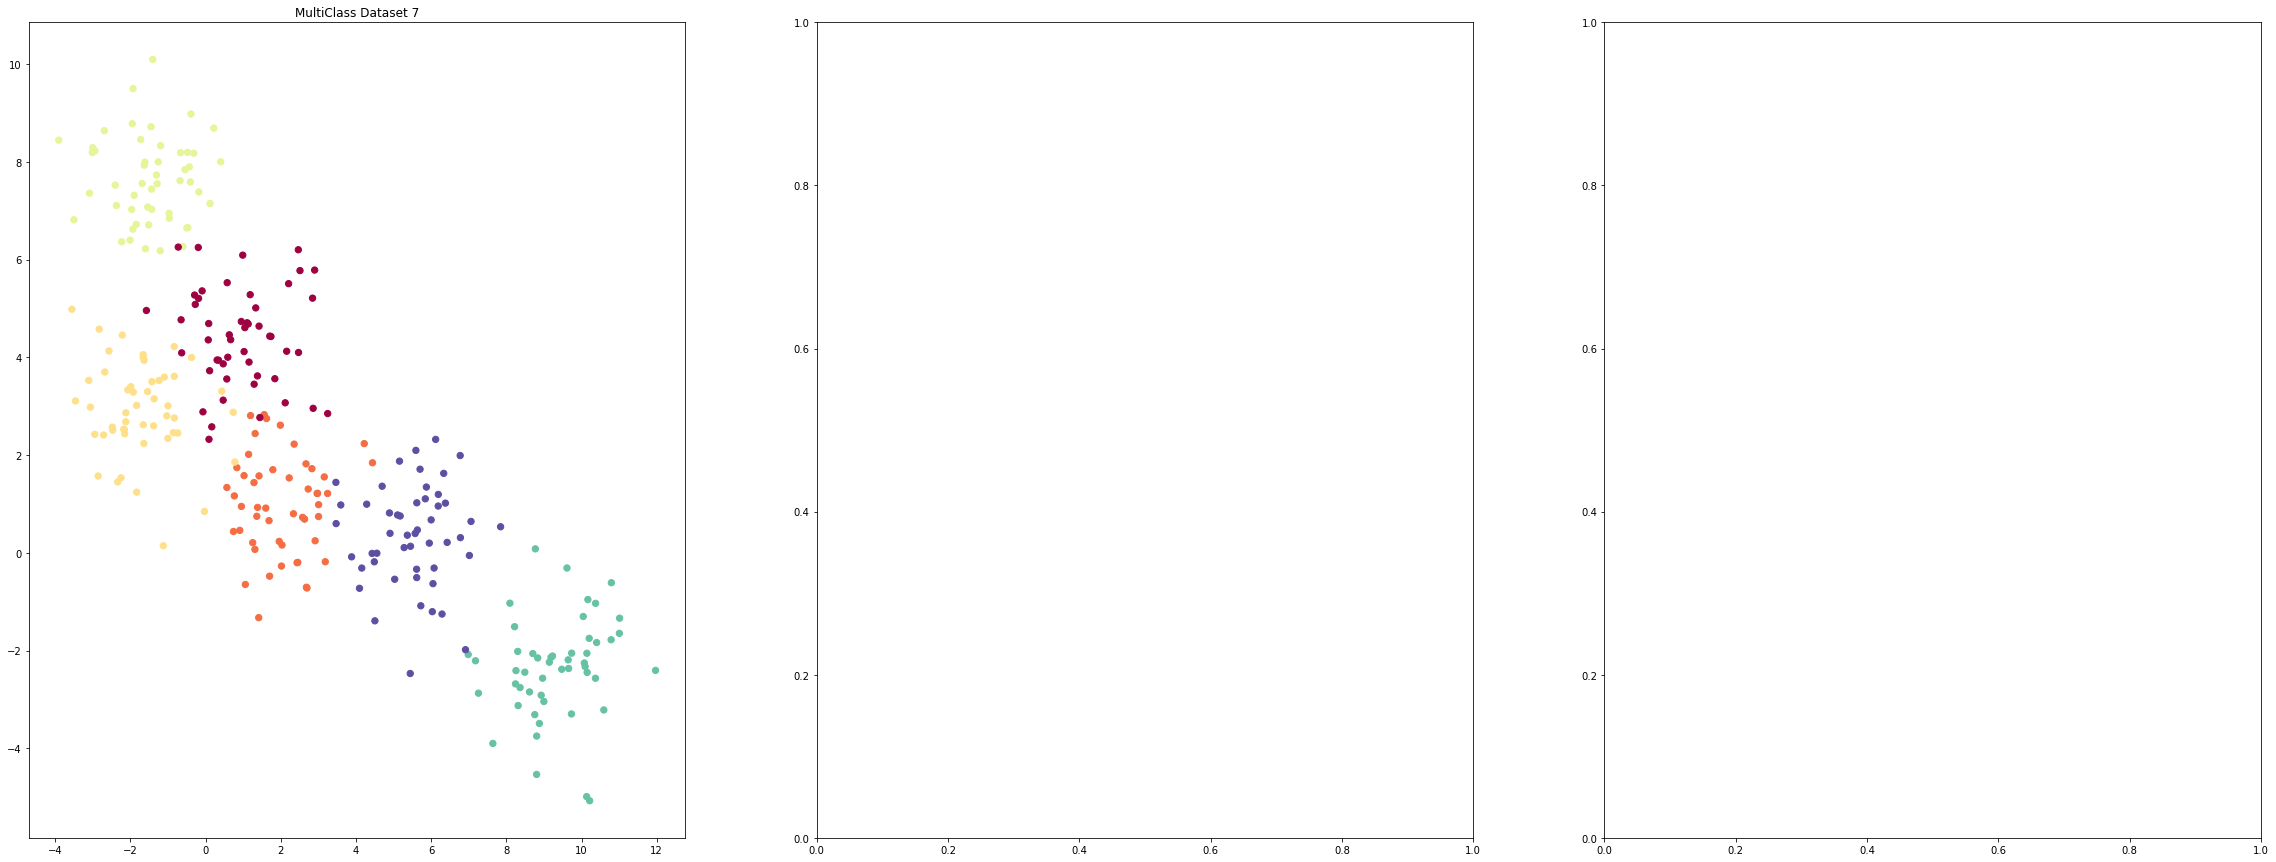

In [14]:
#visualización del dataset
plot_n_m_images([data7],
             ['MultiClass Dataset 7'],
             figx=40, figy=15, n=1, m=3)

# Bibliografía
* DataSet usados: 
* make_circles:  https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles
* make_moons: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons
* make_blobs: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs
* Optimizadores en TensorFlow: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
* Formas de inicializar en TensorFlow: https://www.tensorflow.org/api_docs/python/tf/keras/initializers
* Funciones de activación: https://www.tensorflow.org/api_docs/python/tf/keras/activations 
* Funciones de perdida: https://www.tensorflow.org/api_docs/python/tf/keras/losses

